# Question 1: Machine learning for object recognition


## CIFAR-10 Image Classification Using a Feedforward Neural Network

## Section 2: Setup
Here, we import the necessary Python libraries like TensorFlow, Keras, and Matplotlib, and explain their roles in the project.

In [46]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
#converting data into grayscale
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt 

### 1.a) & 1.b) Data Loading, Preprocessing and Vizualization
In this section, we load the CIFAR-10 dataset using Keras and preprocess it for our neural network. We will also print the number of samples per class in the training and test data

In [65]:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
num_classes = 10

# Flatten the y arrays
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

# Count the number of occurrences of each class in the training set
unique, counts = np.unique(y_train_flat, return_counts=True)
train_class_counts = dict(zip(unique, counts))

print("Number of Occurrences of each class in the training and test set")
print("-------------------------------------------------------------------------")
print("Training set - class counts:", train_class_counts)

# Count the number of occurrences of each class in the test set
unique, counts = np.unique(y_test_flat, return_counts=True)
test_class_counts = dict(zip(unique, counts))
print("Test set - class counts:", test_class_counts)
      
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255


# convert to grayscale images
X_train = rgb2gray(X_train)
X_test = rgb2gray(X_test)

#Splitting the training data set into train and validation set. (Using one of the five batches of training data for validation)
#Validation Set Size: 10000, Training Data Set Size: 40000

X_val = X_train[-10000:]
y_val = y_train[-10000:]
X_train = X_train[:-10000]
y_train = y_train[:-10000]


print("Dataset Stats")
print("-------------------------------------------------------------------------")
print(f"Classes: {num_classes}, y-train: {len(y_train)}, y-test: {len(y_test)}, X-train: {len(X_train)}, X-test: {len(X_test)}, X-validation: {len(X_val)}, Y-validation: {len(y_val)}")

Number of Occurrences of each class in the training and test set
-------------------------------------------------------------------------
Training set - class counts: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}
Test set - class counts: {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}
Dataset Stats
-------------------------------------------------------------------------
Classes: 10, y-train: 40000, y-test: 10000, X-train: 40000, X-test: 10000, X-validation: 10000, Y-validation: 10000


## Number of Occurrences of Each Class in the Training and Test Set

| Set         | Class 0 | Class 1 | Class 2 | Class 3 | Class 4 | Class 5 | Class 6 | Class 7 | Class 8 | Class 9 |
|-------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| Training    | 5000    | 5000    | 5000    | 5000    | 5000    | 5000    | 5000    | 5000    | 5000    | 5000    |
| Test        | 1000    | 1000    | 1000    | 1000    | 1000    | 1000    | 1000    | 1000    | 1000    | 1000    |

## Dataset Stats

| Description   | Value  |
|---------------|--------|
| Classes       | 10     |
| y-train       | 40000  |
| y-test        | 10000  |
| X-train       | 40000  |
| X-test        | 10000  |
| X-validation  | 10000  |
| Y-validation  | 10000  |


### 3.a Training Data Visualization

In this section, we will plot random images from the training data

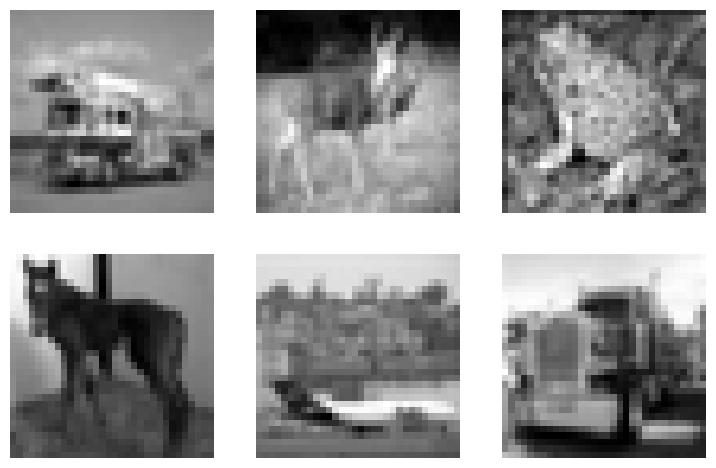

In [48]:
import matplotlib.pyplot as plt

# Plotting 6 images in a 3x3 grid
plt.figure(figsize=(9, 9))  # Set the figure size

# First image
plt.subplot(3, 3, 1)  # 3x3 grid, position 1
plt.imshow(X_train[14436], cmap=plt.get_cmap('gray'))
plt.axis('off')  # Turn off axis

# Second image
plt.subplot(3, 3, 2)  # 3x3 grid, position 2
plt.imshow(X_train[434], cmap=plt.get_cmap('gray'))
plt.axis('off')

# Third image
plt.subplot(3, 3, 3)  # 3x3 grid, position 3
plt.imshow(X_train[32493], cmap=plt.get_cmap('gray'))
plt.axis('off')

# Fourth image
plt.subplot(3, 3, 4)  # 3x3 grid, position 4
plt.imshow(X_train[25454], cmap=plt.get_cmap('gray'))
plt.axis('off')

# Fifth image
plt.subplot(3, 3, 5)  # 3x3 grid, position 5
plt.imshow(X_train[30000], cmap=plt.get_cmap('gray'))  
plt.axis('off')

# Sixth image
plt.subplot(3, 3, 6)  # 3x3 grid, position 6
plt.imshow(X_train[33224], cmap=plt.get_cmap('gray'))  
plt.axis('off')

plt.show()

### 1.c): Model Building, Model Compilation, Training the Model, Model Evaluation and Visualizing Training Results

In this section, we focus on the practical aspects of implementing and evaluating Feedforward Neural Networks (FNNs) for image classification on the CIFAR-10 dataset. The process involves several key steps:

1. **Model Building**: We construct various FNN architectures by experimenting with different combinations of hyperparameters. These hyperparameters include the number of layers, the number of nodes in each layer, the type of activation functions used, the presence or absence of dropout layers, and the application of weight regularization techniques. Each of these choices can significantly impact the model's ability to learn from the training data.

2. **Model Compilation**: Once the models are built, they are compiled with a chosen optimizer, loss function, and metrics for performance evaluation. This step prepares the model for training by setting up the back-end configuration needed for the computation of gradients and updates to the model's weights.

3. **Training the Model**: The compiled models are then trained on the CIFAR-10 training dataset. During training, we monitor the loss and accuracy on both the training and validation sets. This monitoring helps in understanding how well the model is learning and generalizing to unseen data. 

4. **Model Evaluation**: After training, each model's performance is evaluated on the validation set. The key metrics reported include the final classification accuracy and the loss on both the training and validation sets. This evaluation provides insights into the effectiveness of each hyperparameter configuration.

5. **Visualizing Training Results**: To better understand the training process and outcomes, we visualize the training and validation loss and accuracy across epochs. These visualizations help in identifying patterns such as overfitting or underfitting and guide further tuning of the model's hyperparameters.

6. **Reporting Training Time and Model Complexity**: For each model, we report the total training time and the number of parameters. These metrics are crucial for assessing the computational efficiency and complexity of the models.



In [56]:
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping

class Model:
    def __init__(self):
        # Constructor to initialize the Model object
        self.model = self.get_default_model()
        self.history = ""

    def get_default_model(self):
        # Creates and returns a default Sequential model
        model = Sequential()
        return model
    
    def configure(self,config, batch_normalization_layer = False, dropout_layer = False ):
        # Configures the model based on the provided configuration
        # Adds layers to the model as specified in the 'config' dictionary
        self.model.add(Flatten(input_shape=(32, 32)))
        for layer_size in config["layers"]:
            self.model.add(Dense(layer_size, kernel_regularizer=l2(0.001)))
            if batch_normalization_layer: # Adds batch normalization if specified
                self.model.add(BatchNormalization())
            self.model.add(Activation(config['activation']))
            if dropout_layer: # Adds dropout if specified
                self.model.add(Dropout(0.5))
        self.model.add(Dense(10, activation='softmax'))  # Output layer with softmax activation for classification
        adam_optimizer = Adam(learning_rate=0.0001)
        self.model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        return

    def train(self,x_train_flat, y_train_one_hot, validation_data):
         # Trains the model on the provided training data
        early_stopping = EarlyStopping(monitor='val_loss', patience=10)
        self.history = self.model.fit(x_train_flat, y_train_one_hot, epochs=50, 
                    batch_size=64, validation_data=validation_data, callbacks=[early_stopping])
    
    def evaluate_training(self, x_train_flat, y_train_one_hot):
        # Evaluates the model on the training data and returns loss and accuracy
        train_loss, train_acc = self.model.evaluate(x_train_flat, y_train_one_hot)
        return train_loss, train_acc
    
    def evaluate_test(self, x_test_flat, y_test_one_hot):
        # Evaluates the model on the test data and returns loss and accuracy
        test_loss, test_acc = self.model.evaluate(x_test_flat, y_test_one_hot)
        return test_loss, test_acc

    def evaluate_val(self, x_val_flat, y_val_one_hot):
        # Evaluates the model on the validation data and returns loss and accuracy
        val_loss, val_acc = self.model.evaluate(x_val_flat, y_val_one_hot)
        return val_loss, val_acc

    
    def print_summary(self):
        # Prints a summary representation of the model
        print(self.model.summary())
    
    def plot_graph(self):
        # Plots graphs for accuracy and loss during training and validation
        # Accuracy plot
        plt.plot(self.history.history['accuracy'], label='accuracy')
        plt.plot(self.history.history['val_accuracy'], label = 'val_accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim([0.1, 0.6])
        plt.legend(loc='lower right')

        plt.show()

        # Plotting training and validation loss
        plt.plot(self.history.history['loss'], label='training loss')
        plt.plot(self.history.history['val_loss'], label='validation loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(loc='upper right')

        plt.show()

### 1.c.i) Model Experimentation

Model 1
-----------------------------
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 1024)              0         
                                                                 
 dense_90 (Dense)            (None, 1024)              1049600   
                                                                 
 activation_66 (Activation)  (None, 1024)              0         
                                                                 
 dense_91 (Dense)            (None, 512)               524800    
                                                                 
 activation_67 (Activation)  (None, 512)               0         
                                                                 
 dense_92 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1

None
Training model 1
Epoch 1/50
625/625 [==============================] - 2s 4ms/step - loss: 3.6628 - accuracy: 0.2653 - val_loss: 3.4857 - val_accuracy: 0.2896
Epoch 2/50
625/625 [==============================] - 2s 4ms/step - loss: 3.3442 - accuracy: 0.3126 - val_loss: 3.2242 - val_accuracy: 0.3275
Epoch 3/50
625/625 [==============================] - 2s 4ms/step - loss: 3.0935 - accuracy: 0.3352 - val_loss: 3.0014 - val_accuracy: 0.3377
Epoch 4/50
625/625 [==============================] - 2s 4ms/step - loss: 2.8882 - accuracy: 0.3533 - val_loss: 2.8259 - val_accuracy: 0.3516
Epoch 5/50
625/625 [==============================] - 2s 4ms/step - loss: 2.7186 - accuracy: 0.3610 - val_loss: 2.6638 - val_accuracy: 0.3650
Epoch 6/50
625/625 [==============================] - 2s 4ms/step - loss: 2.5765 - accuracy: 0.3687 - val_loss: 2.5346 - val_accuracy: 0.3645
Epoch 7/50
625/625 [==============================] - 2s 4ms/step - loss: 2.4525 - accuracy: 0.3768 - val_loss: 2.4229 - val_a

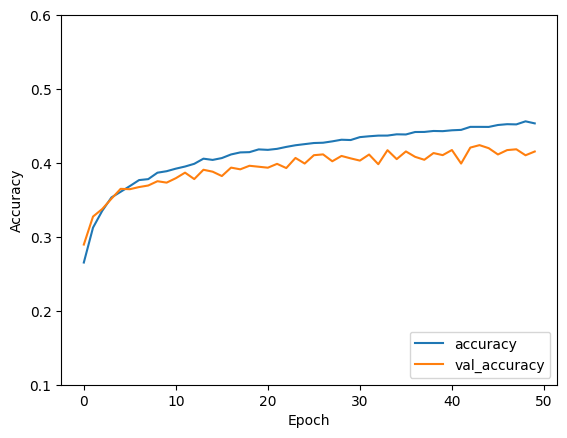

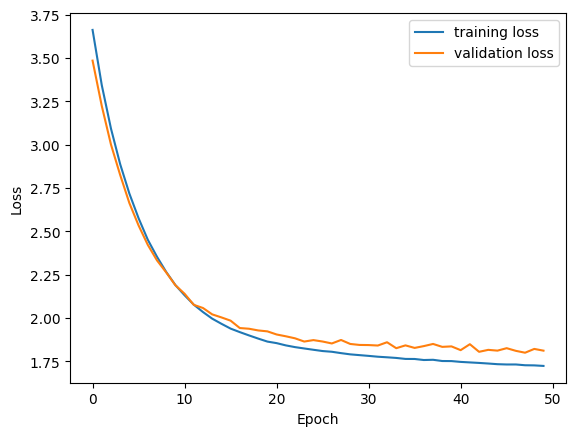

Model 2
-----------------------------
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 1024)              0         
                                                                 
 dense_93 (Dense)            (None, 512)               524800    
                                                                 
 activation_68 (Activation)  (None, 512)               0         
                                                                 
 dense_94 (Dense)            (None, 256)               131328    
                                                                 
 activation_69 (Activation)  (None, 256)               0         
                                                                 
 dense_95 (Dense)            (None, 128)               32896     
                                                                 
 activation_70 

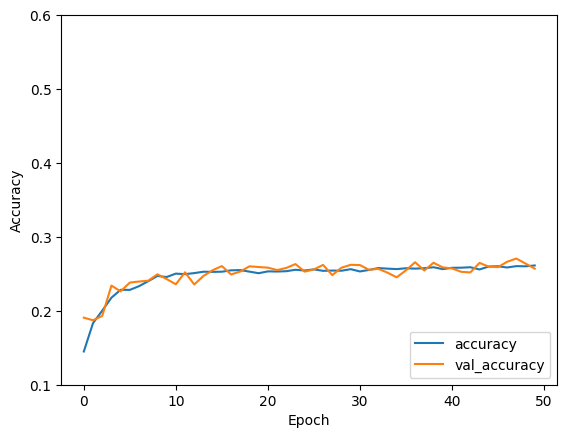

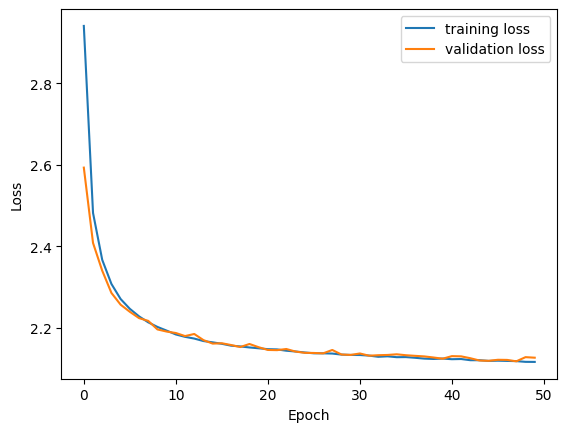

Model 3
-----------------------------
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 1024)              0         
                                                                 
 dense_97 (Dense)            (None, 1024)              1049600   
                                                                 
 activation_71 (Activation)  (None, 1024)              0         
                                                                 
 dense_98 (Dense)            (None, 512)               524800    
                                                                 
 activation_72 (Activation)  (None, 512)               0         
                                                                 
 dense_99 (Dense)            (None, 256)               131328    
                                                                 
 activation_73 

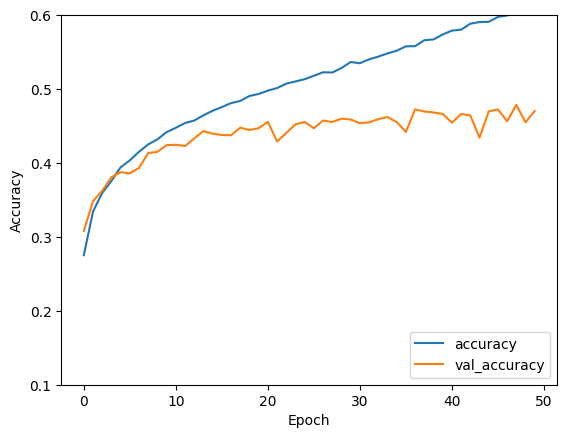

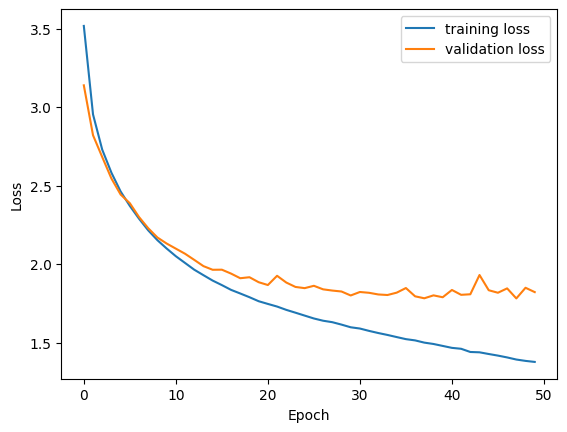

Model 4
-----------------------------
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 1024)              0         
                                                                 
 dense_101 (Dense)           (None, 1024)              1049600   
                                                                 
 batch_normalization_47 (Ba  (None, 1024)              4096      
 tchNormalization)                                               
                                                                 
 activation_74 (Activation)  (None, 1024)              0         
                                                                 
 dropout_41 (Dropout)        (None, 1024)              0         
                                                                 
 dense_102 (Dense)           (None, 512)               524800    
               

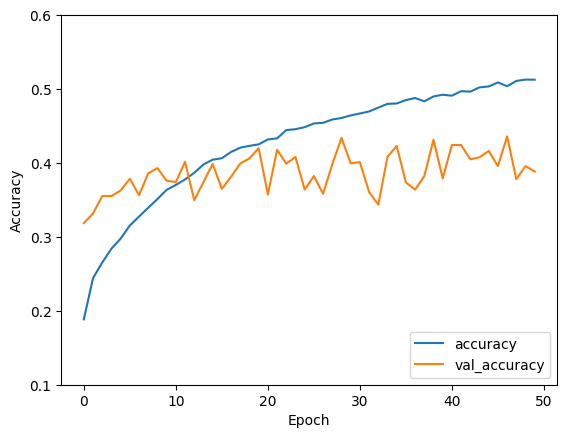

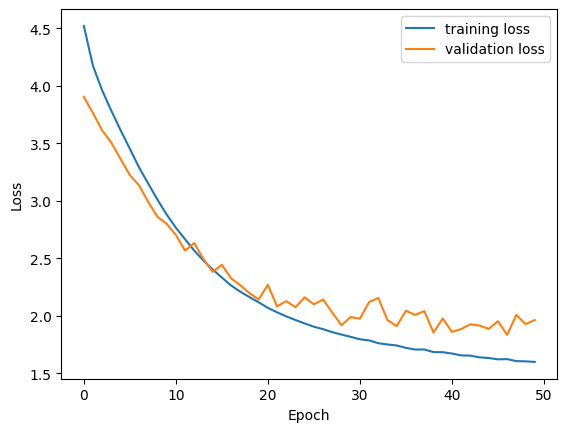

Model 1:
Configuration: {'layers': [1024, 512], 'batch_normalization': False, 'dropout_layer': False, 'activation': 'tanh'}
Training Time: 115.70399498939514 seconds
Train Loss: 1.710050344467163, Train Accuracy: 0.4598250091075897
Validation Loss: 1.8124415874481201, Validation Accuracy: 0.4154999852180481
Number of Parameters: 1579530
--------------------------------------------------
Model 2:
Configuration: {'layers': [512, 256, 128], 'batch_normalization': False, 'dropout_layer': False, 'activation': 'sigmoid'}
Training Time: 80.27357268333435 seconds
Train Loss: 2.1198596954345703, Train Accuracy: 0.25040000677108765
Validation Loss: 2.126849889755249, Validation Accuracy: 0.25699999928474426
Number of Parameters: 690314
--------------------------------------------------
Model 3:
Configuration: {'layers': [1024, 512, 256], 'batch_normalization': False, 'dropout_layer': False, 'activation': 'relu'}
Training Time: 127.90490293502808 seconds
Train Loss: 1.3223867416381836, Train Accu

In [57]:
import time

# Different Model configurations 
configs = [

    {"layers": [1024, 512],"batch_normalization":False,"dropout_layer":False, "activation": "tanh"},
    {"layers": [512, 256, 128],"batch_normalization":False,"dropout_layer":False, "activation": "sigmoid"},
    {"layers": [1024, 512, 256],"batch_normalization":False,"dropout_layer":False, "activation": "relu"},
    {"layers": [1024, 512, 256],"batch_normalization":True,"dropout_layer":True, "activation": "relu"}
]

results = []

for i,config in enumerate(configs):
    print(f"Model {i+1}")
    print("-----------------------------")
    ffn_model = Model()
    ffn_model.configure(config, batch_normalization_layer = config["batch_normalization"], dropout_layer=config["dropout_layer"])
    ffn_model.print_summary()
    start_time = time.time()
    print(f"Training model {i+1}")
    ffn_model.train(X_train, y_train, (X_val, y_val))
    training_time = time.time() - start_time
    train_loss, train_acc = ffn_model.evaluate_training(X_train, y_train)
    val_loss, val_acc = ffn_model.evaluate_val(X_val, y_val)
    num_params = ffn_model.model.count_params()
    result_history = ffn_model.model.history.history
    #plot graphs
    ffn_model.plot_graph()

    results.append({
        "model":ffn_model,
        "config": config,
        "training_time": training_time,
        "train_loss": train_loss,
        "train_acc": train_acc,
        "val_loss": val_loss,
        "val_acc": val_acc,
        "num_params": num_params,
        "history": result_history
    })

# Print the results
for i, result in enumerate(results):
    print(f"Model {i+1}:")
    print(f"Configuration: {result['config']}")
    print(f"Training Time: {result['training_time']} seconds")
    print(f"Train Loss: {result['train_loss']}, Train Accuracy: {result['train_acc']}")
    print(f"Validation Loss: {result['val_loss']}, Validation Accuracy: {result['val_acc']}")
    print(f"Number of Parameters: {result['num_params']}")
    print("-" * 50)

## Model Performance Summary

| Model | Configuration | Training Time (seconds) | Train Loss | Train Accuracy | Validation Loss | Validation Accuracy | Number of Parameters |
|-------|---------------|-------------------------|------------|----------------|-----------------|---------------------|----------------------|
| 1     | Layers: [1024, 512], Batch Normalization: False, Dropout: False, Activation: tanh | 115.70 | 1.7101 | 45.98% | 1.8124 | 41.55% | 1,579,530 |
| 2     | Layers: [512, 256, 128], Batch Normalization: False, Dropout: False, Activation: sigmoid | 80.27 | 2.1199 | 25.04% | 2.1268 | 25.70% | 690,314 |
| 3     | Layers: [1024, 512, 256], Batch Normalization: False, Dropout: False, Activation: relu | 127.90 | 1.3224 | 63.38% | 1.8213 | 47.04% | 1,708,298 |
| 4     | Layers: [1024, 512, 256], Batch Normalization: True, Dropout: True, Activation: relu | 193.30 | 1.7103 | 46.99% | 1.9616 | 38.84% | 1,715,466 |


#### c.ii Test accuracy on the best Model

In [62]:
#Test accuracy on the best model(Model 3).

# find best model based on the best validation set accuracy obtained in the above analyis.

best_result = None
best_val_acc = 0
for result in results:
    if result["val_acc"] > best_val_acc:
        best_val_acc = result["val_acc"]
        best_result = result

test_loss, test_acc = best_result["model"].evaluate_test(X_test, y_test)

print("Test Classification Accuracy")
print(f"Model {3}:")
print(f"Configuration: {best_result['config']}")
print(f"Training Time: {best_result['training_time']} seconds")
print(f"Train Loss: {best_result['train_loss']}, Train Accuracy: {best_result['train_acc']}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")
print(f"Number of Parameters: {best_result['num_params']}")
print("-" * 50)

  1/313 [..............................] - ETA: 3s - loss: 1.4420 - accuracy: 0.5938

313/313 [==============================] - 0s 1ms/step - loss: 1.8317 - accuracy: 0.4658
Test Classification Accuracy
Model 3:
Configuration: {'layers': [1024, 512, 256], 'batch_normalization': False, 'dropout_layer': False, 'activation': 'relu'}
Training Time: 127.90490293502808 seconds
Train Loss: 1.3223867416381836, Train Accuracy: 0.6337500214576721
Test Loss: 1.8317430019378662, Test Accuracy: 0.4657999873161316
Number of Parameters: 1708298
--------------------------------------------------


## Model Performance Analysis

Analyzing the performance of the four models based on the provided results involves considering several factors, including training time, accuracy, loss on both training and validation sets, and the number of parameters. Let's break down the analysis for each model:

#### Learning Rate (0.0001):
- **Rationale**: A learning rate of 0.0001 was chosen as it is small enough to allow the model to converge slowly and avoid overshooting the minimum, but not so small that the training becomes excessively slow. This rate is particularly useful for fine-tuning and ensuring stable convergence in complex networks.

#### L2 Regularization:
- **Rationale**: L2 regularization was applied to penalize larger weights in the model, encouraging the model to learn smaller weights and, thus, simpler models. This approach helps in reducing overfitting by adding a regularization term to the loss function, which becomes more significant as the weight values increase.

These choices reflect a balance between model complexity, training efficiency, and the ability to generalize well on unseen data.

### Model 1
- **Configuration**: 2 layers (1024, 512 neurons), tanh activation, no batch normalization, no dropout.
- **Rationale**: This model was designed to test the effectiveness of a relatively simpler but wider network architecture. The `tanh` activation function was chosen to see how it performs for image classification, as it centers the data around zero, making it easier to model inputs that have strongly negative, neutral, and strongly positive values.
- **Training Time**: 115.7 seconds.
- **Train Loss/Accuracy**: 1.71 / 45.98%.
- **Validation Loss/Accuracy**: 1.81 / 41.55%.
- **Number of Parameters**: 1,579,530.

**Analysis**: This model shows a moderate balance between training time and performance. However, the accuracy is not very high, and the model seems to be overfitting (higher training accuracy than validation accuracy).

### Model 2
- **Configuration**: 3 layers (512, 256, 128 neurons), sigmoid activation, no batch normalization, no dropout.
- **Rationale**: The aim here was to test a deeper architecture while still keeping the network relatively simple. The `sigmoid` activation function was chosen to understand its performance in a multi-layered context, especially given its property of squashing the outputs between 0 and 1, which can be useful for probabilities but may lead to vanishing gradients in deeper networks.

- **Training Time**: 80.3 seconds.
- **Train Loss/Accuracy**: 2.12 / 25.04%.
- **Validation Loss/Accuracy**: 2.13 / 25.7%.
- **Number of Parameters**: 690,314.

**Analysis**: This model is the fastest but performs poorly in terms of accuracy and loss. The use of sigmoid activation functions in deeper networks might be contributing to the lower performance due to issues like vanishing gradients.

### Model 3
- **Configuration**: 3 layers (1024, 512, 256 neurons), relu activation, no batch normalization, no dropout.
- **Rationale**: This setup was intended to evaluate the performance of a deeper and wider network with the `relu` activation function, known for its effectiveness in avoiding the vanishing gradient problem and allowing models to learn faster and perform better.
- **Training Time**: 127.9 seconds.
- **Train Loss/Accuracy**: 1.32 / 63.38%.
- **Validation Loss/Accuracy**: 1.82 / 47.04%.
- **Number of Parameters**: 1,708,298.

**Analysis**: This model shows the best training accuracy and a good balance between training and validation accuracy, suggesting less overfitting compared to Model 1. However, it has the second-longest training time and a relatively high number of parameters.

### Model 4
- **Configuration**: 3 layers (1024, 512, 256 neurons), relu activation, with batch normalization and dropout.
- **Rationale**: The goal was to assess how adding batch normalization and dropout would impact a deep and wide network. Batch normalization helps in reducing the internal covariate shift, and dropout is a regularization method that helps in preventing overfitting.
- **Training Time**: 193.3 seconds.
- **Train Loss/Accuracy**: 1.71 / 46.99%.
- **Validation Loss/Accuracy**: 1.96 / 38.84%.
- **Number of Parameters**: 1,715,466.

**Analysis**: Despite having regularization techniques like batch normalization and dropout, this model does not outperform the others in terms of accuracy. It has the longest training time and a high number of parameters, which might not be justified given its performance.

### Conclusion
- **Best Overall Performance**: Model 3 appears to be the best, offering the highest training accuracy and a good balance between training and validation performance, indicating a better generalization capability.

313/313 [==============================] - 0s 1ms/step
[3 8 8 ... 5 1 7]
[4 8 8 ... 5 5 7]


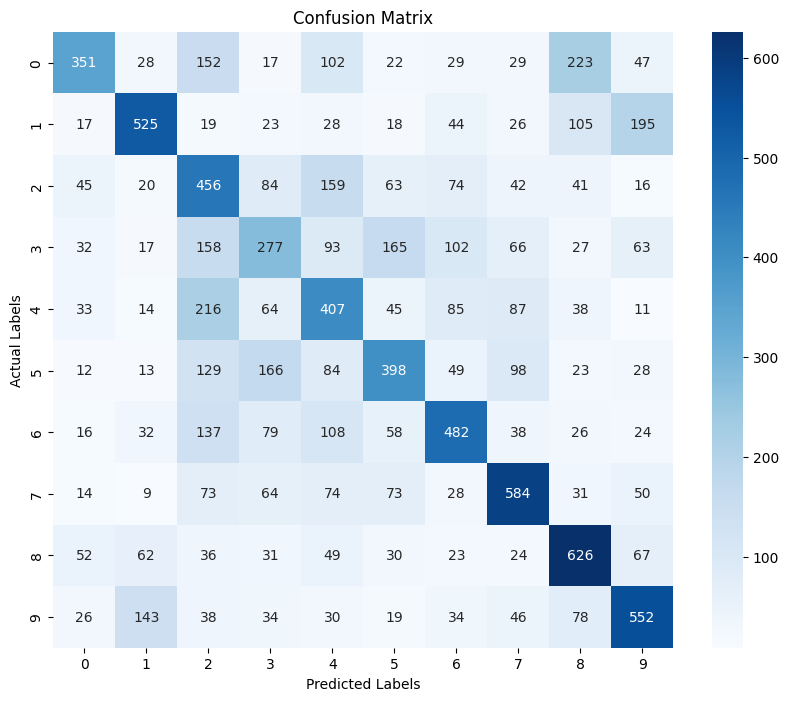

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = best_result["model"].model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1).flatten()
true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(true_classes, predicted_classes)
# Plotting with Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

A few observations from the matrix:

- **Class Confusions**: The highest numbers of misclassifications involve class '0' being confused with class '2' and '9', class '3' with '5', and class '4' with '2'. This suggests that the features of these classes are perhaps more similar to each other from the perspective of the classifier or that the classifier struggles to distinguish between them.

- **Class Performance**: The classifier performs best on class '8', with 626 correct predictions, and worst on class '3', with only 277 correct predictions. This indicates that class '8' is likely the most distinctive class, or the classifier is more attuned to its features, whereas class '3' might have features that overlap significantly with other classes.

- **Areas for Improvement**: To improve the classifier's performance, we can focus on the most confused pairs, perhaps by collecting more representative training data for these classes or by engineering features that better capture the differences between them.

- **Balanced Dataset**: The fairly even spread of misclassifications across different incorrect classes suggests that the dataset might be balanced, meaning that each class has a roughly equal number of samples.
Overall Accuracy: The accuracy of the classifier can be approximated by summing the diagonal elements and dividing by the total number of predictions. However, a more nuanced evaluation would also consider precision, recall, and F1-score for each class, especially if the dataset is imbalanced

--------------

### 1.d): CIFAR-10 Image Classification Using a Convolutional Nueral Network



In [108]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
#converting data into grayscale
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt 

#### Data preprocessing

In [109]:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
num_classes = 10
print(f"Before normalization: Min={X_train.min()}, Max={X_train.max()}")
# Flatten the y arrays
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

# Count the number of occurrences of each class in the training set
unique, counts = np.unique(y_train_flat, return_counts=True)
train_class_counts = dict(zip(unique, counts))
print("Training set - class counts:", train_class_counts)

# Count the number of occurrences of each class in the test set
unique, counts = np.unique(y_test_flat, return_counts=True)
test_class_counts = dict(zip(unique, counts))
print("Test set - class counts:", test_class_counts)
      
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

#Splitting the training data set into train and validation set. (Using one of the five batches of training data for validation)
#Validation Set Size: 10000, Training Data Set Size: 40000

X_val = X_train[-10000:]
y_val = y_train[-10000:]
X_train = X_train[:-10000]
y_train = y_train[:-10000]

print(f"After normalization: Min={X_train[14436].min()}, {X_train[14436].max()}")

print("Dataset Stats")
print("-------------------------------------------------------------------------")
print(f"Classes: {num_classes}, y-train: {len(y_train)}, y-test: {len(y_test)}, X-train: {len(X_train)}, X-test: {len(X_test)}, X-validation: {len(X_val)}, Y-validation: {len(y_val)}")

Before normalization: Min=0, Max=255
Training set - class counts: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}
Test set - class counts: {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}
After normalization: Min=0.01568627543747425, 0.9450980424880981
Dataset Stats
-------------------------------------------------------------------------
Classes: 10, y-train: 40000, y-test: 10000, X-train: 40000, X-test: 10000, X-validation: 10000, Y-validation: 10000


## Number of Occurrences of Each Class in the Training and Test Set

| Set         | Class 0 | Class 1 | Class 2 | Class 3 | Class 4 | Class 5 | Class 6 | Class 7 | Class 8 | Class 9 |
|-------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| Training    | 5000    | 5000    | 5000    | 5000    | 5000    | 5000    | 5000    | 5000    | 5000    | 5000    |
| Test        | 1000    | 1000    | 1000    | 1000    | 1000    | 1000    | 1000    | 1000    | 1000    | 1000    |

## Dataset Stats

| Description   | Value  |
|---------------|--------|
| Classes       | 10     |
| y-train       | 40000  |
| y-test        | 10000  |
| X-train       | 40000  |
| X-test        | 10000  |
| X-validation  | 10000  |
| Y-validation  | 10000  |


#### Data Visualization

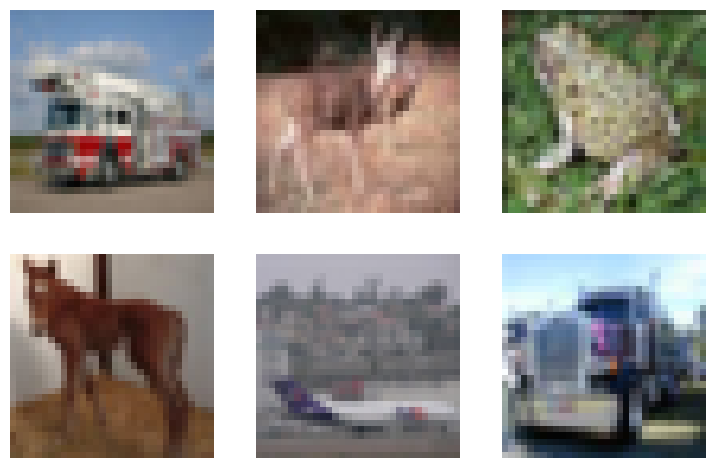

In [110]:
import matplotlib.pyplot as plt

# Assuming X_train is your training dataset
# Plotting 6 images in a 3x3 grid
plt.figure(figsize=(9, 9))  # Set the figure size

# First image
plt.subplot(3, 3, 1)  # 3x3 grid, position 1
plt.imshow(X_train[14436], cmap=plt.get_cmap('gray'))
plt.axis('off')  # Turn off axis

# Second image
plt.subplot(3, 3, 2)  # 3x3 grid, position 2
plt.imshow(X_train[434], cmap=plt.get_cmap('gray'))
plt.axis('off')

# Third image
plt.subplot(3, 3, 3)  # 3x3 grid, position 3
plt.imshow(X_train[32493], cmap=plt.get_cmap('gray'))
plt.axis('off')

# Fourth image
plt.subplot(3, 3, 4)  # 3x3 grid, position 4
plt.imshow(X_train[25454], cmap=plt.get_cmap('gray'))
plt.axis('off')

# Add two more images
# Fifth image
plt.subplot(3, 3, 5)  # 3x3 grid, position 5
plt.imshow(X_train[30000], cmap=plt.get_cmap('gray'))  # Change the index as needed
plt.axis('off')

# Sixth image
plt.subplot(3, 3, 6)  # 3x3 grid, position 6
plt.imshow(X_train[33224], cmap=plt.get_cmap('gray'))  # Change the index as needed
plt.axis('off')

# The remaining subplots are empty, but you can add more images if you like

plt.show()

In [111]:
def plot_graph(results):
    plt.plot(results.history['accuracy'])
    plt.plot(results.history['val_accuracy'])
    plt.legend(['train', 'test'], loc='upper left')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()

    plt.plot(results.history['loss'])
    plt.plot(results.history['val_loss'])
    plt.legend(['train', 'test'], loc='upper left')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

#### 1.d.i)Image classification with CNN Model

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_115 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_84 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_116 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_85 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_121 (Dropout)       (None, 6, 6, 64)          0         
                                                                 
 flatten_63 (Flatten)        (None, 2304)            

None
Training Model 1:
Epoch Size: 30, Batch Size: 64
Epoch 1/30
625/625 [==============================] - 8s 12ms/step - loss: 0.0824 - accuracy: 0.2905 - val_loss: 0.0756 - val_accuracy: 0.3909
Epoch 2/30
625/625 [==============================] - 7s 12ms/step - loss: 0.0738 - accuracy: 0.4024 - val_loss: 0.0718 - val_accuracy: 0.4312
Epoch 3/30
625/625 [==============================] - 7s 12ms/step - loss: 0.0706 - accuracy: 0.4357 - val_loss: 0.0693 - val_accuracy: 0.4580
Epoch 4/30
625/625 [==============================] - 8s 12ms/step - loss: 0.0684 - accuracy: 0.4606 - val_loss: 0.0676 - val_accuracy: 0.4700
Epoch 5/30
625/625 [==============================] - 8s 12ms/step - loss: 0.0663 - accuracy: 0.4810 - val_loss: 0.0655 - val_accuracy: 0.4930
Epoch 6/30
625/625 [==============================] - 8s 12ms/step - loss: 0.0646 - accuracy: 0.4972 - val_loss: 0.0641 - val_accuracy: 0.5088
Epoch 7/30
625/625 [==============================] - 7s 11ms/step - loss: 0.0629 - accu

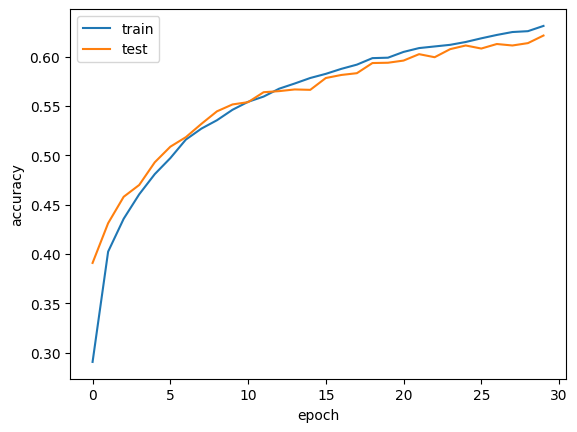

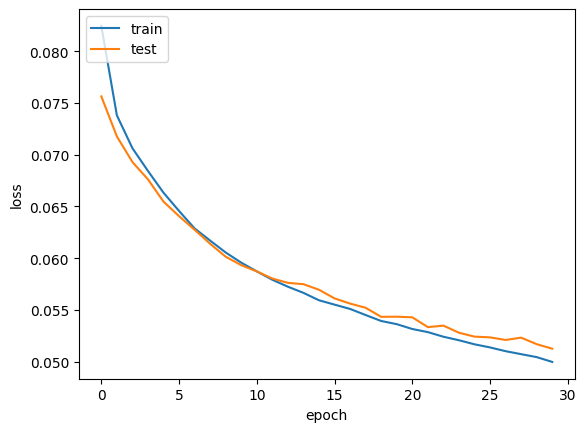

Training Time: 217.16470384597778 seconds
Train Loss: 0.04808807373046875, Train Accuracy: 0.651324987411499
Validation Loss: 0.05125363916158676, Validation Accuracy: 0.6215999722480774
Number of Parameters: 42442
--------------------------------------------------
Epoch Size: 30, Batch Size: 32
Epoch 1/30
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0809 - accuracy: 0.3088 - val_loss: 0.0748 - val_accuracy: 0.3979
Epoch 2/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.0724 - accuracy: 0.4169 - val_loss: 0.0701 - val_accuracy: 0.4519
Epoch 3/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.0684 - accuracy: 0.4602 - val_loss: 0.0672 - val_accuracy: 0.4737
Epoch 4/30
1250/1250 [==============================] - 8s 7ms/step - loss: 0.0656 - accuracy: 0.4865 - val_loss: 0.0650 - val_accuracy: 0.5029
Epoch 5/30
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0633 - accuracy: 0.5124 - val_loss: 0.0628 - val_

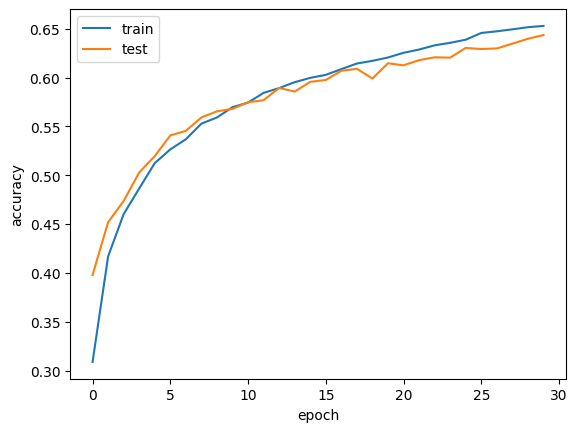

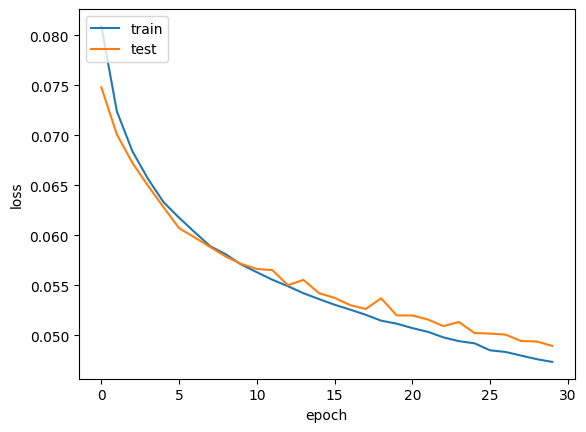

Training Time: 236.415696144104 seconds
Train Loss: 0.044946517795324326, Train Accuracy: 0.6796500086784363
Validation Loss: 0.04894741624593735, Validation Accuracy: 0.6435999870300293
Number of Parameters: 42442
--------------------------------------------------
Epoch Size: 50, Batch Size: 64
Epoch 1/50
625/625 [==============================] - 7s 11ms/step - loss: 0.0836 - accuracy: 0.2702 - val_loss: 0.0767 - val_accuracy: 0.3832
Epoch 2/50
625/625 [==============================] - 7s 11ms/step - loss: 0.0741 - accuracy: 0.4011 - val_loss: 0.0719 - val_accuracy: 0.4300
Epoch 3/50
625/625 [==============================] - 7s 11ms/step - loss: 0.0705 - accuracy: 0.4365 - val_loss: 0.0694 - val_accuracy: 0.4543
Epoch 4/50
625/625 [==============================] - 7s 12ms/step - loss: 0.0679 - accuracy: 0.4659 - val_loss: 0.0678 - val_accuracy: 0.4710
Epoch 5/50
625/625 [==============================] - 7s 12ms/step - loss: 0.0659 - accuracy: 0.4856 - val_loss: 0.0648 - val_accur

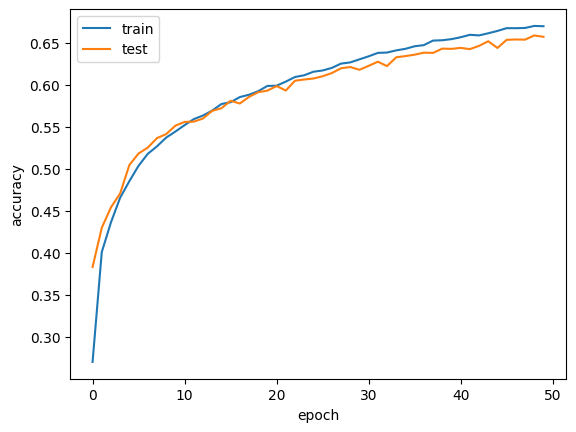

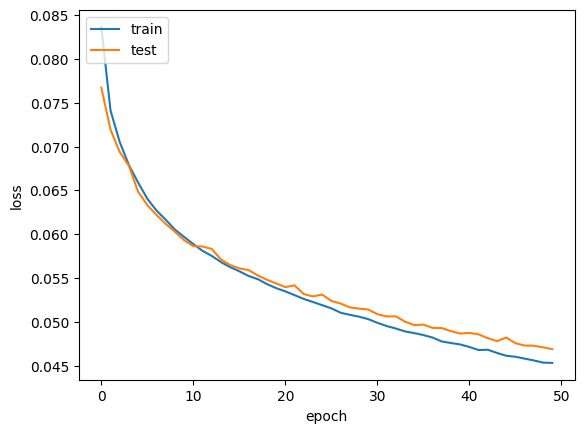

Training Time: 364.9321959018707 seconds
Train Loss: 0.0426611565053463, Train Accuracy: 0.697950005531311
Validation Loss: 0.046900149434804916, Validation Accuracy: 0.6575000286102295
Number of Parameters: 42442
--------------------------------------------------
Epoch Size: 50, Batch Size: 32
Epoch 1/50
1250/1250 [==============================] - 8s 7ms/step - loss: 0.0801 - accuracy: 0.3165 - val_loss: 0.0737 - val_accuracy: 0.4010
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0714 - accuracy: 0.4309 - val_loss: 0.0693 - val_accuracy: 0.4552
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0679 - accuracy: 0.4667 - val_loss: 0.0665 - val_accuracy: 0.4807
Epoch 4/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0653 - accuracy: 0.4921 - val_loss: 0.0640 - val_accuracy: 0.5094
Epoch 5/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0632 - accuracy: 0.5124 - val_loss: 0.0622 - val_a

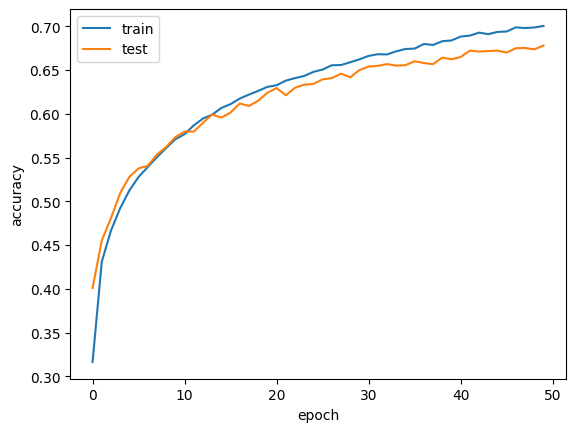

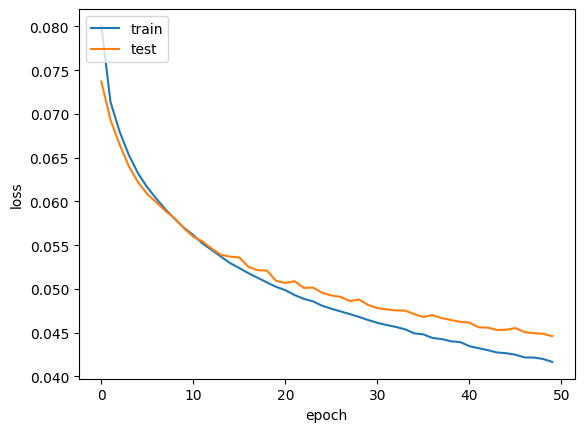

Training Time: 386.47698307037354 seconds
Train Loss: 0.038758620619773865, Train Accuracy: 0.729574978351593
Validation Loss: 0.04460343345999718, Validation Accuracy: 0.6779000163078308
Number of Parameters: 42442
--------------------------------------------------


In [112]:
#Model 1 - Simple Layers
def cnn_model1():
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape = (32,32,3), activation="relu"))
    model.add(MaxPooling2D(strides = (2,2)))
    model.add(Conv2D(64, (3,3), activation="relu"))
    model.add(MaxPooling2D(strides = (2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(num_classes, activation="softmax"))
    model.compile(loss="mean_squared_error", optimizer=Adam(0.0001),metrics=["accuracy"])

    return model

#Get the Model
model1 = cnn_model1()

print(model1.summary())
epochs_list = [30,50]
batch_size_list = [64,32]
print(f"Training Model 1:")
models_info_1 = {}
for epochs in epochs_list:
    for batch_size in batch_size_list:
        model1 = cnn_model1()
        model_key = f"Model_epochs_{epochs}_batch_{batch_size}"
        #Fitting the model with the training set
        print(f"Epoch Size: {epochs}, Batch Size: {batch_size}")
        start_time = time.time()
        results = model1.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=epochs, batch_size=batch_size)
        training_time = time.time() - start_time
        val_loss, val_acc = model1.evaluate(X_val, y_val, verbose=0)
        train_loss, train_acc = model1.evaluate(X_train, y_train, verbose=0)
        param_count = model1.count_params()

        models_info_1[model_key] = {
            "model": model1,
            "results": results,
            "training_time": training_time,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_loss": val_loss,
            "val_acc": val_acc,
            "num_params": param_count
        }
        print("CNN Model Accuracy: %.2f%%", val_acc*100)  
        plot_graph(results)
        print(f"Training Time: {training_time} seconds")
        print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")
        print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")
        print(f"Number of Parameters: {param_count}")
        print("-" * 50)

### CNN Training Model 1 Performance Data

| Epoch Size | Batch Size | Training Time (seconds) | Train Loss | Train Accuracy | Validation Loss | Validation Accuracy | Number of Parameters |
|------------|------------|-------------------------|------------|----------------|-----------------|---------------------|----------------------|
| 30         | 64         | 217.16                  | 0.0481     | 65.13%         | 0.0513          | 62.16%              | 42,442               |
| 30         | 32         | 236.42                  | 0.0449     | 67.97%         | 0.0489          | 64.36%              | 42,442               |
| 50         | 64         | 364.93                  | 0.0427     | 69.80%         | 0.0469          | 65.75%              | 42,442               |
| 50         | 32         | 386.48                  | 0.0388     | 72.96%         | 0.0446          | 67.79%              | 42,442               |

### Analysis of Training Model 1

The performance of Model 1 was evaluated under different training configurations, varying in epoch sizes and batch sizes. The following observations can be made from the data:

- **Impact of Epoch Size and Batch Size:**
  - Increasing the epoch size consistently improved both training and validation accuracy. This suggests that the model benefits from more training iterations, allowing it to better learn from the dataset.
  - Similarly, a smaller batch size (32 compared to 64) led to higher accuracy. This could be due to the fact that smaller batch sizes often provide a regularizing effect and help the model generalize better.

- **Training Time:**
  - As expected, both an increase in epochs and a decrease in batch size resulted in longer training times. Specifically, the longest training time was observed with 50 epochs and a batch size of 32, which is logical given the greater number of iterations and updates.

- **Accuracy Improvement:**
  - The highest training accuracy (72.96%) and validation accuracy (67.79%) were achieved with 50 epochs and a batch size of 32. This configuration seems to strike the best balance between learning from the data and generalizing to new data.

- **Loss Metrics:**
  - The loss metrics for both training and validation decreased with the increase in epochs and decrease in batch size, which aligns with the observed improvements in accuracy.

- **Parameter Count:**
  - The number of parameters remained constant across all configurations, as expected, since the architecture of the model did not change.

In conclusion, for Model 1, a configuration of 50 epochs and a batch size of 32 appears to be the most effective, yielding the highest accuracy and lowest loss, albeit at the cost of increased training time. This suggests a trade-off between computational efficiency and model performance.

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_125 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_94 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_126 (Dropout)       (None, 15, 15, 32)        0         
                                                                 
 conv2d_126 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 conv2d_127 (Conv2D)         (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_95 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                               

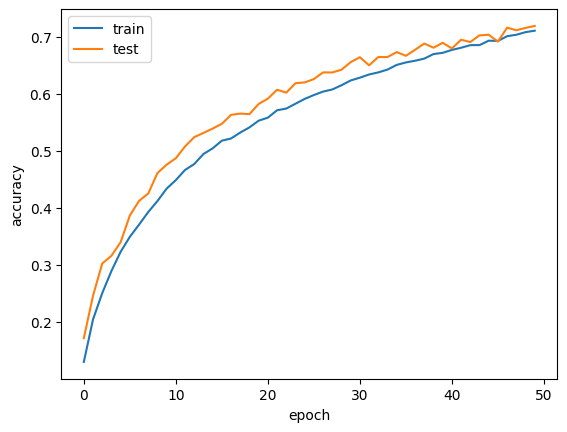

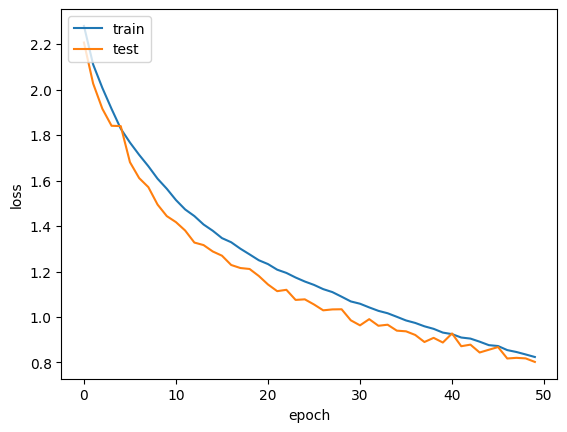

Training Time: 626.024090051651 seconds
Train Loss: 0.6365753412246704, Train Accuracy: 0.7793999910354614
Validation Loss: 0.8023478388786316, Validation Accuracy: 0.7188000082969666
Number of Parameters: 295562
--------------------------------------------------
Epoch Size: 50, Batch Size: 32
Epoch 1/50
1250/1250 [==============================] - 16s 12ms/step - loss: 2.2318 - accuracy: 0.1540 - val_loss: 2.1058 - val_accuracy: 0.2217
Epoch 2/50
1250/1250 [==============================] - 15s 12ms/step - loss: 1.9910 - accuracy: 0.2608 - val_loss: 1.8564 - val_accuracy: 0.3218
Epoch 3/50
1250/1250 [==============================] - 15s 12ms/step - loss: 1.8133 - accuracy: 0.3309 - val_loss: 1.6972 - val_accuracy: 0.3826
Epoch 4/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.7015 - accuracy: 0.3770 - val_loss: 1.6148 - val_accuracy: 0.4163
Epoch 5/50
1250/1250 [==============================] - 14s 11ms/step - loss: 1.6178 - accuracy: 0.4071 - val_loss: 1.512

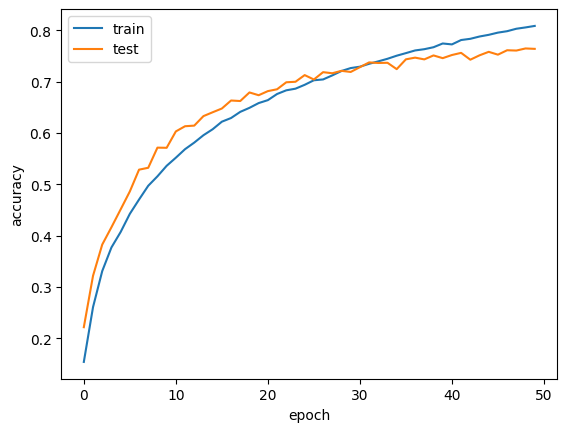

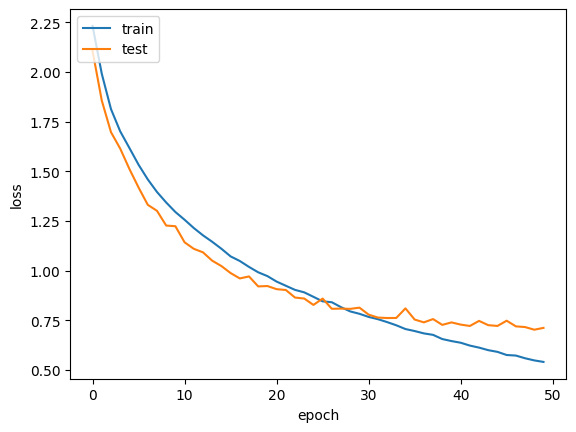

Training Time: 716.6335151195526 seconds
Train Loss: 0.3244116008281708, Train Accuracy: 0.8896499872207642
Validation Loss: 0.7124627232551575, Validation Accuracy: 0.7638000249862671
Number of Parameters: 295562
--------------------------------------------------


In [113]:

#Model 2
def cnn_model2():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
    model.add(MaxPooling2D(strides=(2, 2), padding='same'))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(strides=(2, 2), padding='same'))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (3, 3), activation = 'relu'))
    model.add(Conv2D(128, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(strides=(2, 2), padding='same'))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = 'SGD', metrics=['accuracy'])
    
    return model

#Get the Model
model2 = cnn_model2()
print(model2.summary())
epochs_list = [50]
batch_size_list = [64,32]
models_info_2 = {}
print(f"Training Model 2:")
for epochs in epochs_list:
    for batch_size in batch_size_list:
        model2 = cnn_model2()
        model_key = f"Model_epochs_{epochs}_batch_{batch_size}"
        #Fitting the model with the training set
        print(f"Epoch Size: {epochs}, Batch Size: {batch_size}")
        start_time = time.time()
        results = model2.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=epochs, batch_size=batch_size)
        training_time = time.time() - start_time
        val_loss, val_acc = model2.evaluate(X_val, y_val, verbose=0)
        train_loss, train_acc = model2.evaluate(X_train, y_train, verbose=0)
        param_count = model2.count_params()

        models_info_2[model_key] = {
            "model": model2,
            "results": results,
            "training_time": training_time,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_loss": val_loss,
            "val_acc": val_acc,
            "num_params": param_count
        }
        print("CNN Model Accuracy: %.2f%%", val_acc*100)  
        plot_graph(results)
        print(f"Training Time: {training_time} seconds")
        print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")
        print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")
        print(f"Number of Parameters: {param_count}")
        print("-" * 50)

### Performance Data for Model 2

| Epoch Size | Batch Size | Training Time (seconds) | Train Loss | Train Accuracy | Validation Loss | Validation Accuracy | Number of Parameters |
|------------|------------|-------------------------|------------|----------------|-----------------|---------------------|----------------------|
| 50         | 64         | 626.02                  | 0.6366     | 77.94%         | 0.8023          | 71.88%              | 295,562              |
| 50         | 32         | 716.63                  | 0.3244     | 88.97%         | 0.7125          | 76.38%              | 295,562              |

### Analysis of Training Model 2

The performance of Model 2 was evaluated under two different training configurations, varying in batch sizes while keeping the epoch size constant. The following observations can be made from the data:

- **Impact of Batch Size:**
  - The model trained with a smaller batch size (32) outperformed the one with a larger batch size (64) in terms of both training and validation accuracy. This suggests that the smaller batch size allowed for better generalization, possibly due to more frequent updates of the model weights.
  - Specifically, the training accuracy improved from 77.94% to 88.97%, and the validation accuracy increased from 71.88% to 76.38% when the batch size was reduced from 64 to 32.

- **Training Time:**
  - A smaller batch size led to a longer training time. The training time increased from 626.02 seconds to 716.63 seconds when the batch size was halved. This is expected as smaller batches mean more updates per epoch.

- **Loss Metrics:**
  - A significant reduction in training loss was observed when the batch size was reduced (from 0.6366 to 0.3244). The validation loss also decreased, indicating better model performance with a smaller batch size.

- **Parameter Count:**
  - The number of parameters remained constant at 295,562 across both configurations, as the model architecture was unchanged.

In conclusion, for Model 2, a configuration of 50 epochs with a batch size of 32 appears to be more effective, yielding higher accuracy and lower loss. This configuration, however, requires more training time. The results suggest that smaller batch sizes can significantly improve model performance, especially in terms of generalization to validation data, but at the cost of increased computational resources and time.


Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_140 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_104 (B  (None, 32, 32, 32)        128       
 atchNormalization)                                              
                                                                 
 conv2d_141 (Conv2D)         (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_105 (B  (None, 30, 30, 32)        128       
 atchNormalization)                                              
                                                                 
 max_pooling2d_103 (MaxPool  (None, 15, 15, 32)        0         
 ing2D)                                                          
                                                     

None
Training Model 3:
Epoch Size: 50, Batch Size: 64
Epoch 1/50
625/625 [==============================] - 32s 49ms/step - loss: 1.8424 - accuracy: 0.3683 - val_loss: 1.5319 - val_accuracy: 0.4544
Epoch 2/50
625/625 [==============================] - 30s 47ms/step - loss: 1.2662 - accuracy: 0.5461 - val_loss: 1.1214 - val_accuracy: 0.5993
Epoch 3/50
625/625 [==============================] - 28s 46ms/step - loss: 1.0851 - accuracy: 0.6164 - val_loss: 1.0218 - val_accuracy: 0.6419
Epoch 4/50
625/625 [==============================] - 29s 47ms/step - loss: 0.9675 - accuracy: 0.6619 - val_loss: 0.8876 - val_accuracy: 0.6824
Epoch 5/50
625/625 [==============================] - 29s 47ms/step - loss: 0.8787 - accuracy: 0.6928 - val_loss: 0.7572 - val_accuracy: 0.7290
Epoch 6/50
625/625 [==============================] - 29s 46ms/step - loss: 0.7995 - accuracy: 0.7210 - val_loss: 0.7051 - val_accuracy: 0.7528
Epoch 7/50
625/625 [==============================] - 29s 46ms/step - loss: 0.7433

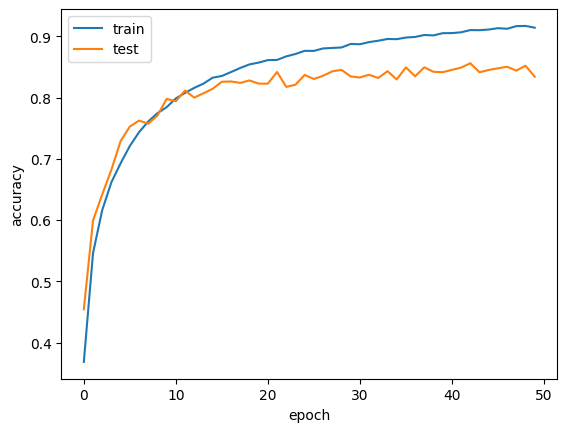

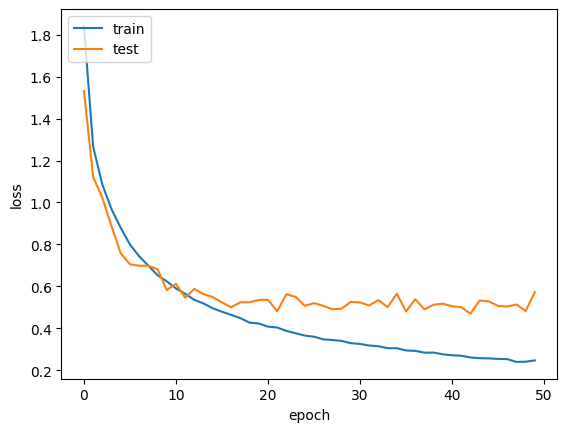

Training Time: 1455.284128665924 seconds
Train Loss: 0.1103823333978653, Train Accuracy: 0.9635249972343445
Validation Loss: 0.5725595355033875, Validation Accuracy: 0.8342000246047974
Number of Parameters: 356266
--------------------------------------------------
Epoch Size: 50, Batch Size: 32
Epoch 1/50
1250/1250 [==============================] - 37s 29ms/step - loss: 1.7758 - accuracy: 0.3949 - val_loss: 1.2415 - val_accuracy: 0.5496
Epoch 2/50
1250/1250 [==============================] - 36s 28ms/step - loss: 1.2332 - accuracy: 0.5597 - val_loss: 0.9757 - val_accuracy: 0.6460
Epoch 3/50
1250/1250 [==============================] - 36s 28ms/step - loss: 1.0529 - accuracy: 0.6308 - val_loss: 0.8566 - val_accuracy: 0.6965
Epoch 4/50
1250/1250 [==============================] - 36s 29ms/step - loss: 0.9213 - accuracy: 0.6794 - val_loss: 0.8246 - val_accuracy: 0.7150
Epoch 5/50
1250/1250 [==============================] - 36s 28ms/step - loss: 0.8343 - accuracy: 0.7157 - val_loss: 0.69

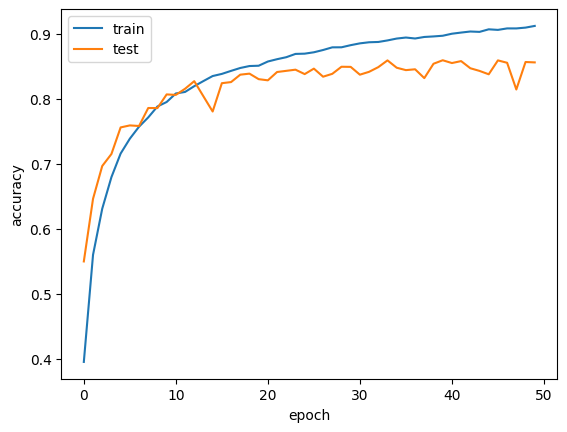

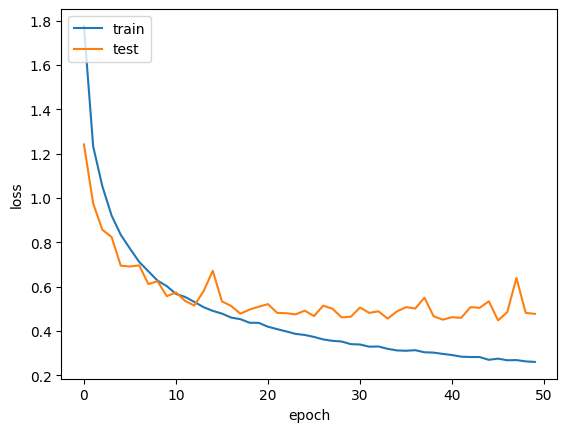

Training Time: 1818.4728138446808 seconds
Train Loss: 0.06260102987289429, Train Accuracy: 0.9829249978065491
Validation Loss: 0.47749975323677063, Validation Accuracy: 0.8560000061988831
Number of Parameters: 356266
--------------------------------------------------


In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Model 3
def cnn_model3(num_classes):
    model = Sequential()

    # Initial Convolutional Layers with Batch Normalization and He Initialization
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))  # Dropout to prevent overfitting

    # Increasing number of filters in deeper layers
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    # Further increasing the filters
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    # Flatten and Fully Connected Layers with Dropout
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

#Get the Model
model3 = cnn_model3(num_classes)
print(model3.summary())
epochs_list = [50]
batch_size_list = [64,32]
print(f"Training Model 3:")
models_info_3 = {}
for epochs in epochs_list:
    for batch_size in batch_size_list:
        model3 = cnn_model3(num_classes)
        model_key = f"Model_epochs_{epochs}_batch_{batch_size}"
        #Fitting the model with the training set
        print(f"Epoch Size: {epochs}, Batch Size: {batch_size}")
        start_time = time.time()
        results = model3.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=epochs, batch_size=batch_size)
        training_time = time.time() - start_time
        val_loss, val_acc = model3.evaluate(X_val, y_val, verbose=0)
        train_loss, train_acc = model3.evaluate(X_train, y_train, verbose=0)
        param_count = model3.count_params()

        models_info_3[model_key] = {
            "model": model3,
            "results": results,
            "training_time": training_time,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_loss": val_loss,
            "val_acc": val_acc,
            "num_params": param_count
        }
        print("CNN Model Accuracy: %.2f%%", val_acc*100)  
        plot_graph(results)
        print(f"Training Time: {training_time} seconds")
        print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")
        print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")
        print(f"Number of Parameters: {param_count}")
        print("-" * 50)

### Model 3 Training Performance Summary

| Epoch Size | Batch Size | Training Time (seconds) | Train Loss | Train Accuracy | Validation Loss | Validation Accuracy | Number of Parameters |
|------------|------------|-------------------------|------------|----------------|-----------------|---------------------|----------------------|
| 50         | 64         | 1455.28                 | 0.11038    | 0.96352        | 0.57256         | 0.83420             | 356266               |
| 50         | 32         | 1818.47                 | 0.06260    | 0.98292        | 0.47750         | 0.85600             | 356266               |

### Analysis of Model 3 Training Performance

When analyzing the training performance of Model 3, several key observations emerge:

1. **Impact of Batch Size**: 
   - Reducing the batch size from 64 to 32 increases the training time from 1455.28 seconds to 1818.47 seconds.
   - There is a notable improvement in both training (from 96.35% to 98.29%) and validation accuracy (from 83.42% to 85.60%).
   - Suggests that a smaller batch size, though more time-consuming, leads to better learning and generalization.

2. **Accuracy Metrics**: 
   - Training accuracy improved significantly with a smaller batch size.
   - Validation accuracy also increased, indicating a more robust model with less overfitting.

3. **Loss Metrics**: 
   - Train loss decreases significantly from 0.11038 to 0.06260 when the batch size is halved.
   - Validation loss also decreases from 0.57256 to 0.47750, aligning with the improved validation accuracy.

4. **Training Time**: 
   - A smaller batch size leads to longer training times due to more iterations per epoch.

5. **Parameter Count**: 
   - Remains constant at 356266, indicating unchanged model complexity.
   - Performance differences are solely due to batch size variations.

In conclusion, for Model 3, reducing the batch size has led to a longer training time but resulted in a more accurate and generalizable model. 


### Model Comparision


| Model | Best Epoch Size | Best Batch Size | Best Training Time (seconds) | Best Train Loss | Best Train Accuracy | Best Validation Loss | Best Validation Accuracy | Number of Parameters |
|-------|-----------------|-----------------|------------------------------|-----------------|---------------------|----------------------|--------------------------|----------------------|
| 1     | 50              | 32              | 386.48                       | 0.0388          | 72.96%              | 0.0446               | 67.79%                   | 42,442               |
| 2     | 50              | 32              | 716.63                       | 0.3244          | 88.97%              | 0.7125               | 76.38%                   | 295,562              |
| 3     | 50              | 32              | 1818.47                      | 0.06260         | 98.29%              | 0.47750              | 85.60%                   | 356,266              |


| Model | Differences in Hyperparameters                                                                                   |
|-------|-------------------------------------------------------------------------------------------------------------------|
| 1 vs 2 | Model 1 uses mean squared error loss and an Adam optimizer with a learning rate of 0.0001. Model 2 has a more complex architecture with additional convolutional layers and uses categorical crossentropy loss with an SGD optimizer. |
| 1 vs 3 | Model 1 has a simpler architecture with fewer layers and no batch normalization. Model 3 uses a more complex architecture with batch normalization, He uniform initialization, and an Adam optimizer with a learning rate of 0.001. |
| 2 vs 3 | Model 2 uses SGD optimizer, while Model 3 uses Adam optimizer with a different learning rate. Model 3 also incorporates He initialization and batch normalization layers which are not present in Model 2. |



| Hyperparameter      | Model 1              | Model 2              | Model 3                |
|---------------------|----------------------|----------------------|------------------------|
| Convolution Layers  | 2                    | 5                    | 6                      |
| Pooling Layers      | 2 MaxPooling2D       | 3 MaxPooling2D       | 3 MaxPooling2D         |
| Dropout Layers      | 1 Dropout (0.2)      | 3 Dropouts (0.2 each)| 4 Dropouts (0.2, 0.3, 0.4, 0.5) |
| Dense Layers        | 1 Dense (softmax)    | 2 Denses (1 relu, 1 softmax) | 2 Denses (1 relu, 1 softmax) |
| Activation Functions| relu, softmax        | relu, softmax        | relu, softmax          |
| Loss Function       | mean_squared_error   | categorical_crossentropy | categorical_crossentropy |
| Optimizer           | Adam (0.0001)        | SGD                  | Adam (0.001)           |
| Additional          | -                    | -                    | Batch normalization, He initialization |
| Number of Parameters| 42,442               | 295,562              | 356,266                |


#### Analysis of CNN Model Performances

##### Model Complexity
- **Model 3** has the highest number of parameters, making it the most complex among the three. This complexity is likely the reason for its superior training accuracy.

##### Training Time
- **Model 1** is the quickest to train, possibly due to its simpler architecture. On the other hand, **Model 3** requires the most training time, which aligns with its higher complexity and smaller batch size.

##### Accuracy
- With a training accuracy of 98.29% and validation accuracy of 85.60%, **Model 3** stands out as the top performer. **Model 2** falls short in performance, despite having a significant number of parameters, implying that **Model 3**'s architectural design and regularization techniques are more effective.

##### Loss
- Despite having the lowest training and validation loss, **Model 1** does not achieve the highest accuracy, suggesting potential underfitting and an inability to capture the underlying patterns in the data effectively.

##### Batch Size
- All models show better performance with a **batch size of 32** compared to 64, suggesting that smaller batch sizes may lead to better generalization by allowing more frequent updates during training.

##### Conclusion
**Model 3** appears to be the best option for accuracy, even though it has a longer training time and higher loss. This indicates the benefits of added complexity and regularization. However, the trade-off between training time and accuracy is crucial. For instance, if slightly lower accuracy is permissible, **Model 1** provides a more efficient solution. Moreover, the gap between training and validation accuracy in **Model 3** suggests possible overfitting, whereas **Model 1**'s smaller gap may indicate better generalization to unseen data.


#### 1.d.ii) Test accuracy on the Best Model

In [118]:
#Test accuracy on the best model(Model 3).

# find best model based on the best validation set accuracy obtained in the above analyis.

model_key = f"Model_epochs_{50}_batch_{32}"
test_loss, test_acc = models_info_3[model_key]["model"].evaluate(X_test, y_test)

print("Test Classification Accuracy")
print(f"Model {3}:")
print(f"Training Time: {models_info_3[model_key]['training_time']} seconds")
print(f"Train Loss: {models_info_3[model_key]['train_loss']}, Train Accuracy: {models_info_3[model_key]['train_acc']}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")
print(f"Number of Parameters: {models_info_3[model_key]['num_params']}")
print("-" * 50)

313/313 [==============================] - 2s 7ms/step - loss: 0.4933 - accuracy: 0.8508
Test Classification Accuracy
Model 3:
Training Time: 1818.4728138446808 seconds
Train Loss: 0.06260102987289429, Train Accuracy: 0.9829249978065491
Test Loss: 0.4933340847492218, Test Accuracy: 0.8507999777793884
Number of Parameters: 356266
--------------------------------------------------


#### Confusion Matrix

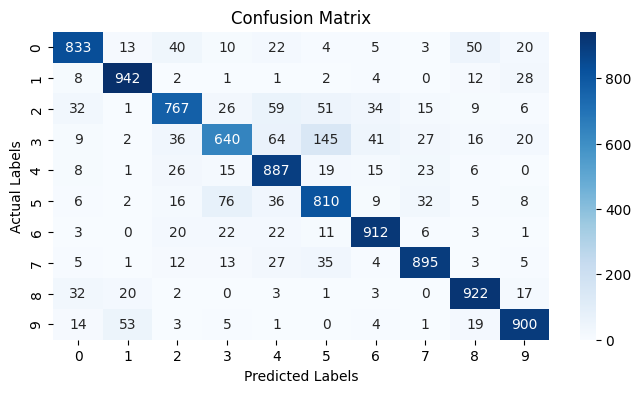

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = models_info_3[model_key]["model"].predict(X_test,verbose=0)
predicted_classes = np.argmax(predictions, axis=1).flatten()
true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(true_classes, predicted_classes)
# Plotting with Seaborn
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

####  Confusion matrix Analysis
In this matrix, we see that class '6' has the highest true positive count with 912 correct predictions, indicating that the model performs best on this class. Class '3', with 640 correct predictions, seems to be the most challenging for the model. Off-diagonal numbers represent misclassifications, where the model predicted a different class than the actual one (false positives and false negatives). For example, class '0' was often misclassified as class '2' or class '8', as indicated by the higher numbers in those cells.

The color scale on the right indicates the frequency of predictions, with darker shades representing higher frequencies. This color coding helps quickly identify which classes are more frequently confused. For instance, the darker off-diagonal cells suggest frequent misclassifications between certain classes. Overall, the model seems to be performing reasonably well, given the high true positive counts, but there's room for improvement in distinguishing between classes that are frequently confused, like '3' with '5' and '8', or '0' with '2' and '8'. 

## FNN vs. CNN Model 3 Comparison

When comparing the Feedforward Neural Network (FNN) and Convolutional Neural Network (CNN) Model 3, several distinctions are evident:

### Network Complexity
- The FNN has 1,708,298 parameters, significantly more than the CNN's 356,266 parameters, indicating a denser network.

### Training Time
- CNN models take longer to train than FNN models. The CNN training time varies with batch size, increasing with smaller batch sizes.

### Accuracy
- The FNN's training accuracy is 63.38%, much lower than the CNN's, which exceeds 96%.
- For validation accuracy, the FNN achieves 47.04%, while the CNN reaches up to 85.60%.

### Loss Metrics
- The FNN's train and validation losses are higher than those of the CNN, suggesting better learning and generalization from the CNN.

### Overfitting
- The FNN shows a larger gap between training and validation accuracy, implying potential overfitting, whereas the CNN, particularly with a smaller batch size, indicates less overfitting.

### Generalization
- The CNN demonstrates superior generalization capabilities with lower validation loss and higher validation accuracy compared to the FNN.

**Conclusion:** The CNN outperforms the FNN in accuracy, loss, and generalization. Its architecture allows it to efficiently handle image data and capture spatial features through shared weights and pooling, unlike the FNN, which lacks these spatial feature detection mechanisms and may be more prone to overfitting due to its larger number of parameters and lack of regularization techniques.

--------

## Q.3 University Admission Prediction Using Support Vector Machines (SVM)

In this Question solution, we aim to predict university admission outcomes using Support Vector Machines (SVM) with various kernel types. The dataset, sourced from a GitHub repository, includes various academic and personal attributes of applicants.

### Workflow:
1. **Data Preprocessing**: The dataset will be preprocessed to create a binary admission label. Values in the "Chance of Admit" column greater than its mean will be labeled as 1 (admission likely), and 0 otherwise.
2. **Model Initialization**: Four SVM models with different kernels (linear, RBF, and polynomial) will be initialized to explore their effectiveness in classification.
3. **Feature Selection and Model Training**: The models will be trained on different combinations of features (CGPA, SOP, LOR, GRE Score) to determine which features are most predictive of admission.
4. **Result Visualization**: The decision boundaries of each model-feature combination will be visualized to understand how each model classifies the data.
5. **Result Analysis**: By examining the visualizations, we will deduce which combination of features and kernel type yields the best prediction results.
6. **Result Postprocessing**: We will discuss the presence of outliers in the dataset and explore how a one-class SVM could be used for outlier detection.

This analysis aims to identify the most effective SVM model and feature combination for predicting university admissions, providing insights into the admission process and the relevance of different academic metrics.


#### 3.a) Data Preprocessing:

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://github.com/selva86/datasets/raw/master/Admission.csv"
data = pd.read_csv(url)

# Create binary labels
mean_chance = data['Chance of Admit '].mean()
data['Admit'] = (data['Chance of Admit '] > mean_chance).astype(int)

# Drop the original 'Chance of Admit ' column
data = data.drop('Chance of Admit ', axis=1)

#### 3.b) Model Initialization:

Initializing 4 types of SVC as follows:
1. SVC with linear kernel
2. LinearSVC (linear kernel)
3. SVC with RBF kernel
4. SVC with polynomial (degree 3) kernel


In [104]:
#Model Initialization
# Initialize SVM models
svc_linear = SVC(kernel='linear')
linear_svc = LinearSVC()
svc_rbf = SVC(kernel='rbf')
svc_poly = SVC(kernel='poly', degree=3)

#### 3.c) Feature Selection and Model Training
Train each SVM Model with the
following feature combinations to predict admission:
1. CGPA and SOP
2. CGPA and GRE Score
3. SOP with LOR
4. LOR with GRE Score

In [105]:
# Define feature combinations
feature_combinations = {
    'CGPA_SOP': ['CGPA', 'SOP'],
    'CGPA_GRE': ['CGPA', 'GRE Score'],
    'SOP_LOR': ['SOP', 'LOR '],
    'LOR_GRE': ['LOR ', 'GRE Score']
}

# Function to train models
def train_models(features):
    X = data[features]
    y = data['Admit']

    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardizing the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Training models
    for model in [svc_linear, linear_svc, svc_rbf, svc_poly]:
        model.fit(X_train, y_train)
        print(f"Trained {model} with features {features}")

for combo_name, features in feature_combinations.items():
    train_models(features)


Trained SVC(kernel='linear') with features ['CGPA', 'SOP']
Trained LinearSVC() with features ['CGPA', 'SOP']
Trained SVC() with features ['CGPA', 'SOP']
Trained SVC(kernel='poly') with features ['CGPA', 'SOP']
Trained SVC(kernel='linear') with features ['CGPA', 'GRE Score']
Trained LinearSVC() with features ['CGPA', 'GRE Score']
Trained SVC() with features ['CGPA', 'GRE Score']
Trained SVC(kernel='poly') with features ['CGPA', 'GRE Score']
Trained SVC(kernel='linear') with features ['SOP', 'LOR ']
Trained LinearSVC() with features ['SOP', 'LOR ']
Trained SVC() with features ['SOP', 'LOR ']
Trained SVC(kernel='poly') with features ['SOP', 'LOR ']
Trained SVC(kernel='linear') with features ['LOR ', 'GRE Score']
Trained LinearSVC() with features ['LOR ', 'GRE Score']
Trained SVC() with features ['LOR ', 'GRE Score']
Trained SVC(kernel='poly') with features ['LOR ', 'GRE Score']


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `Tru

#### 3.d) Result Visualization:

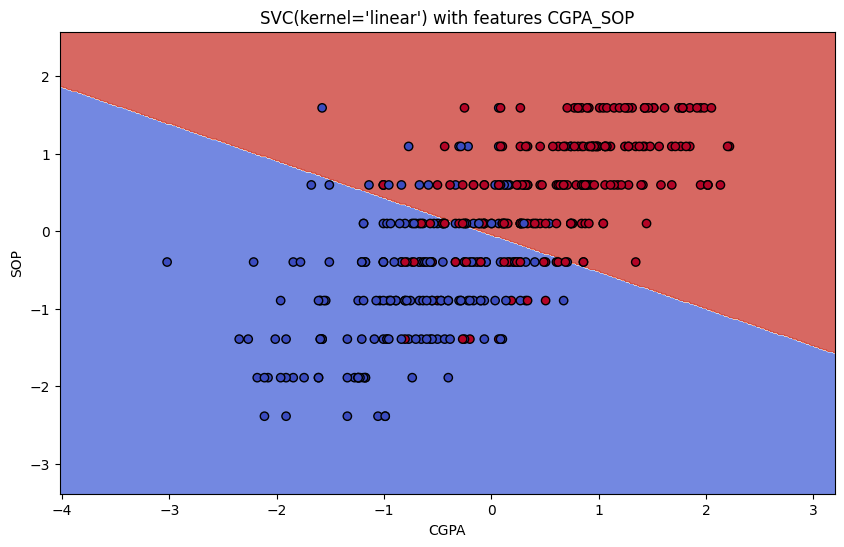

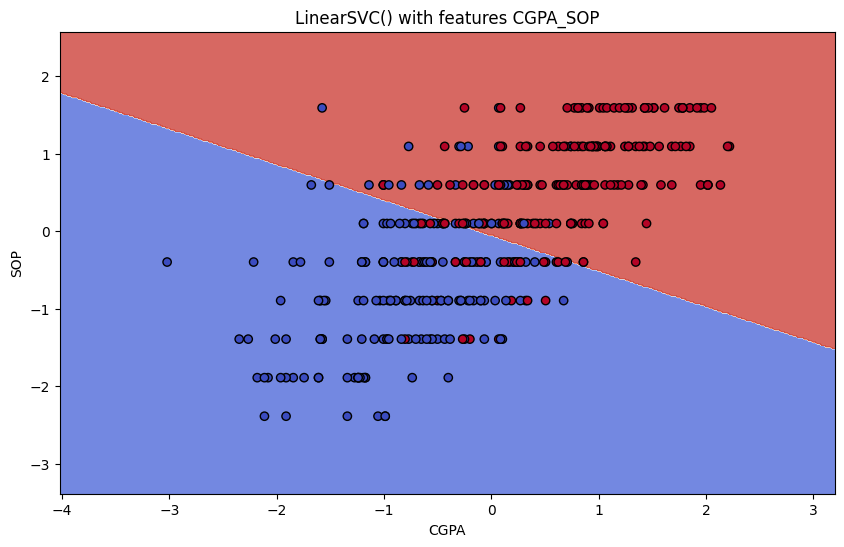

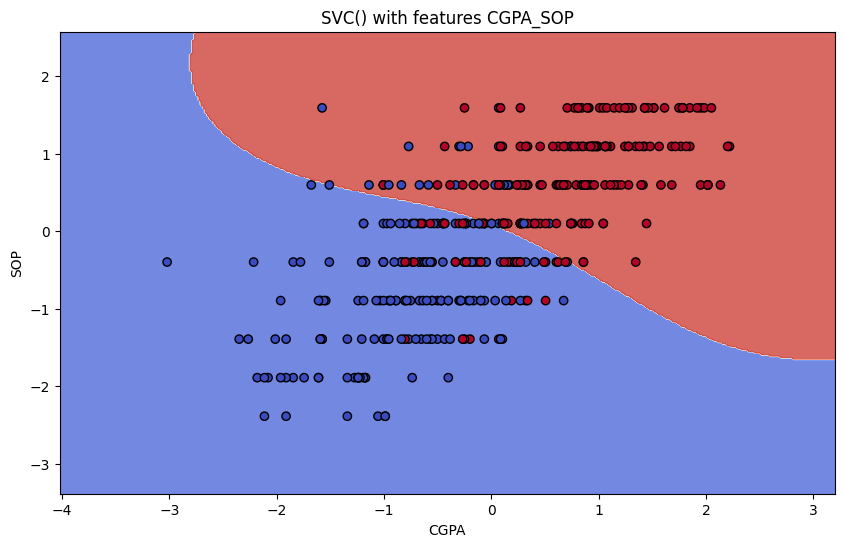

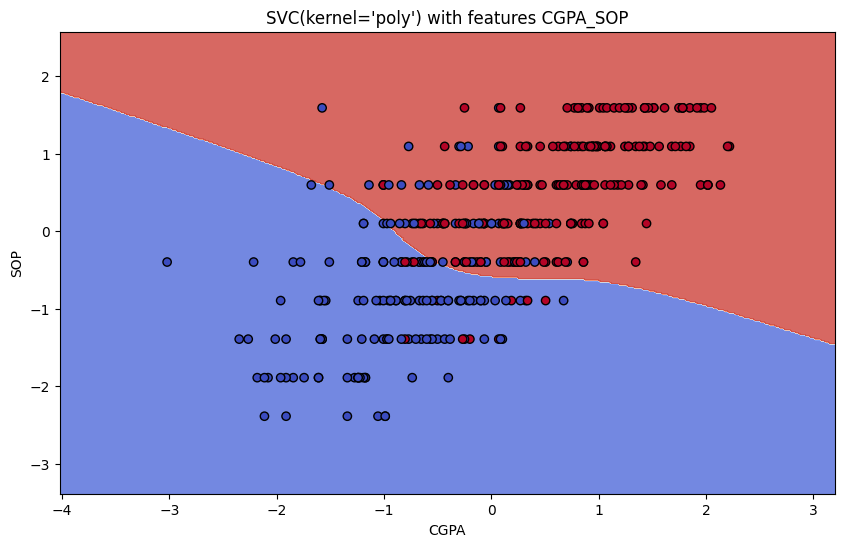

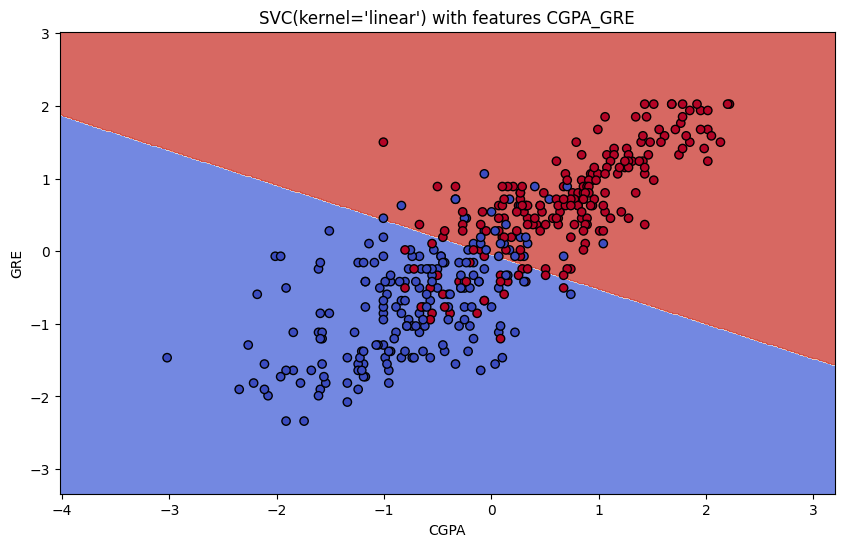

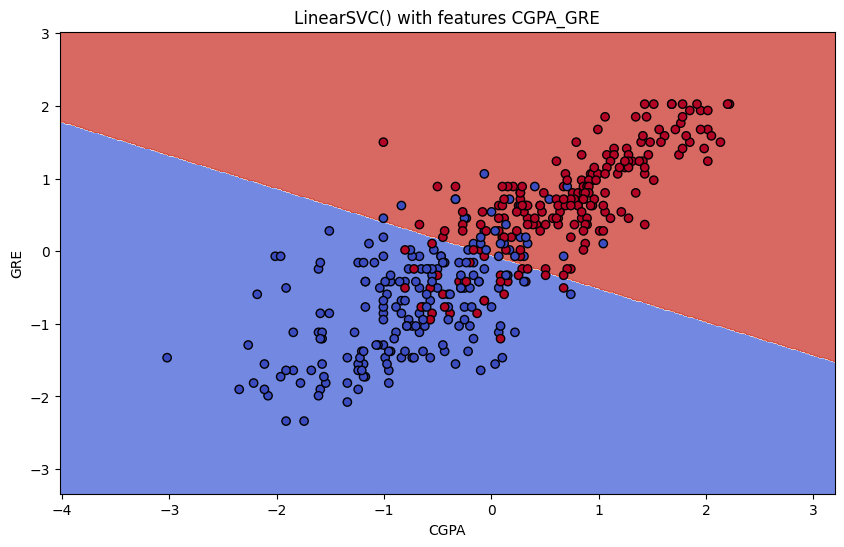

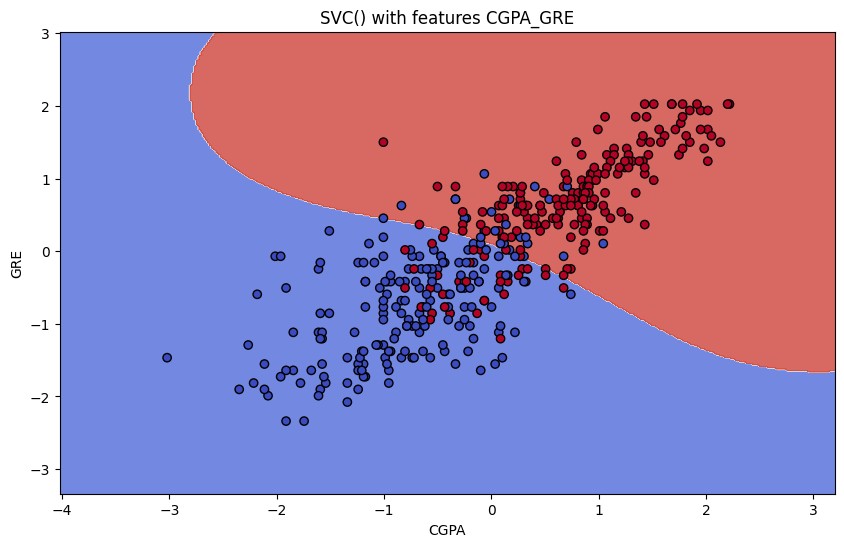

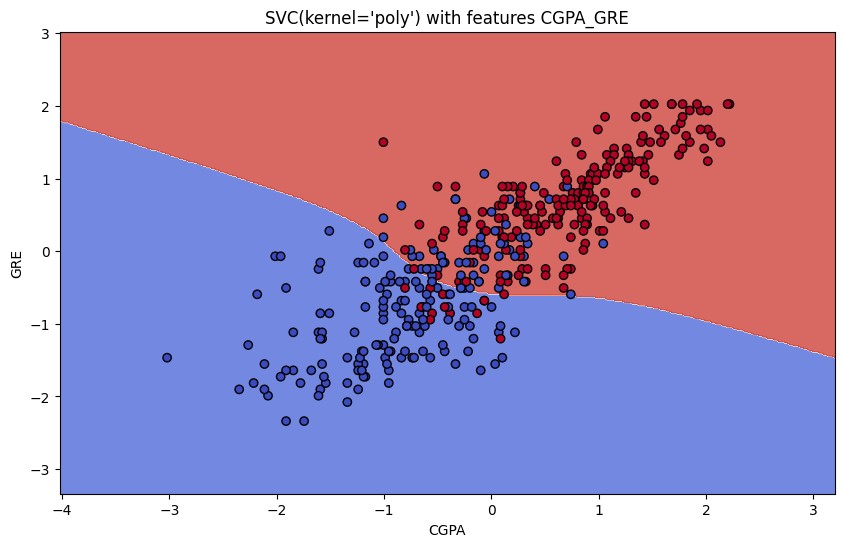

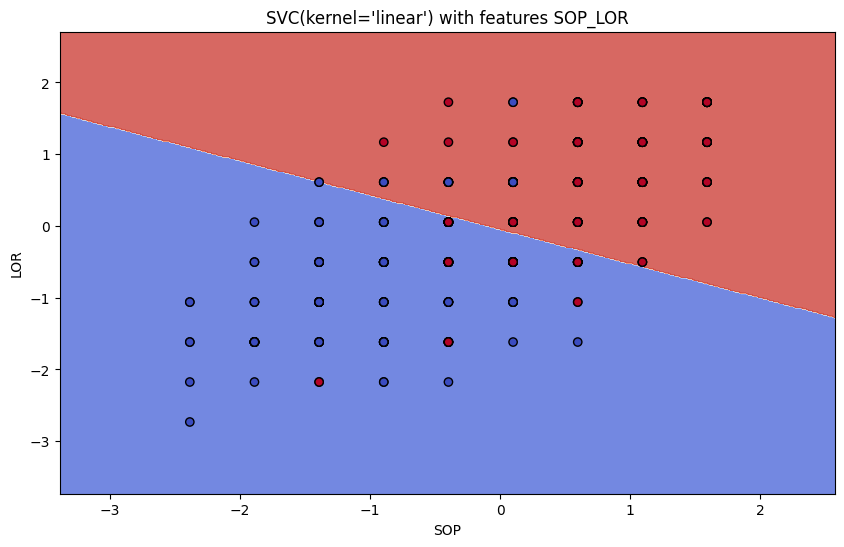

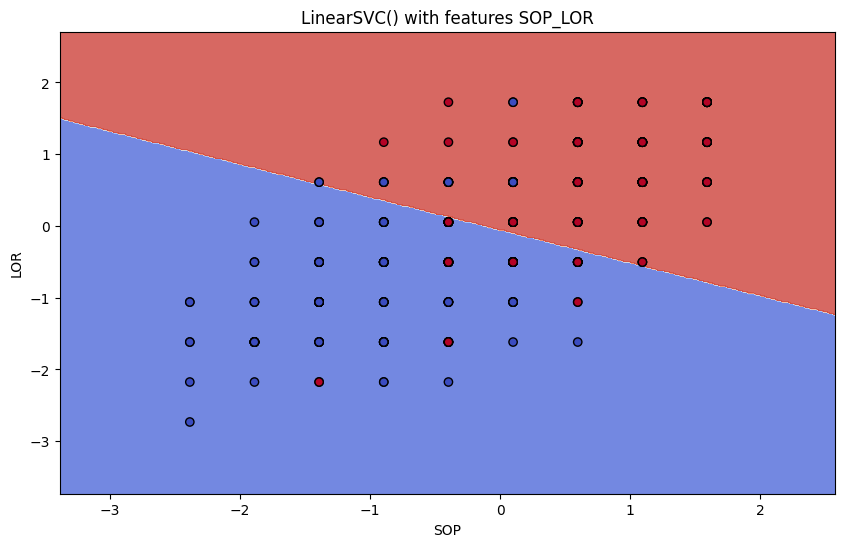

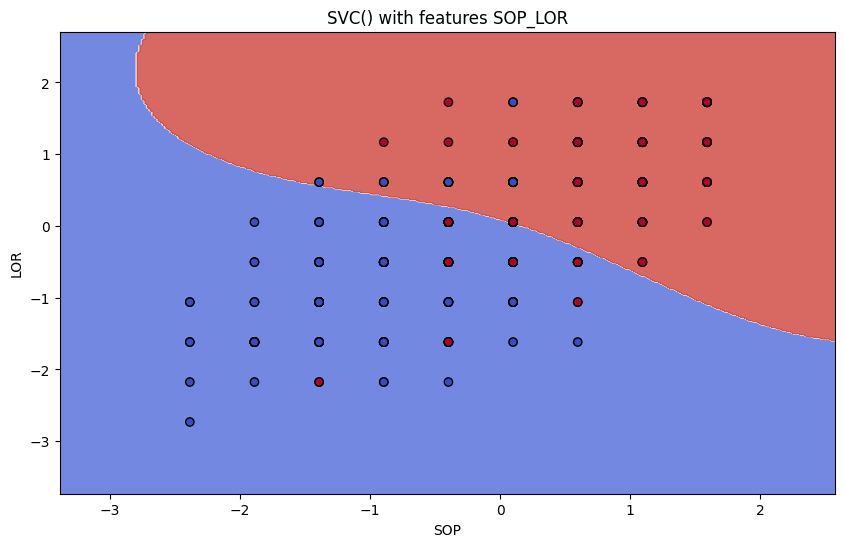

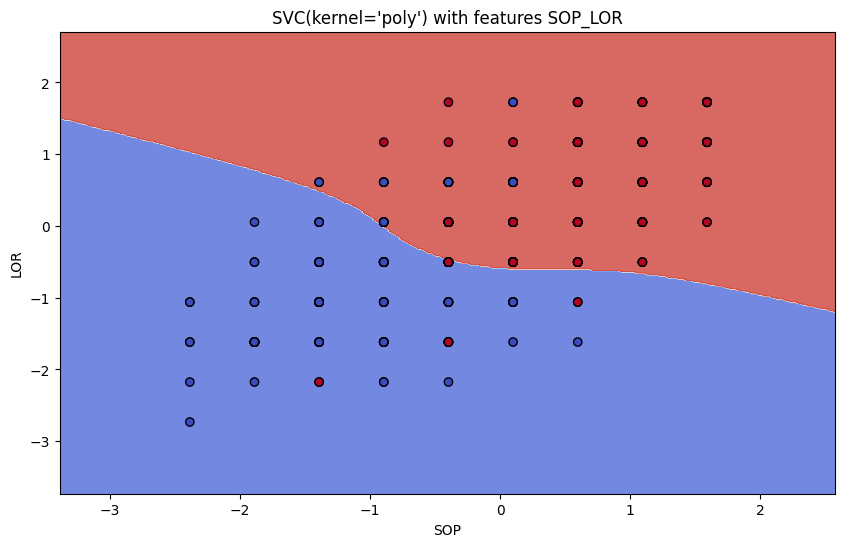

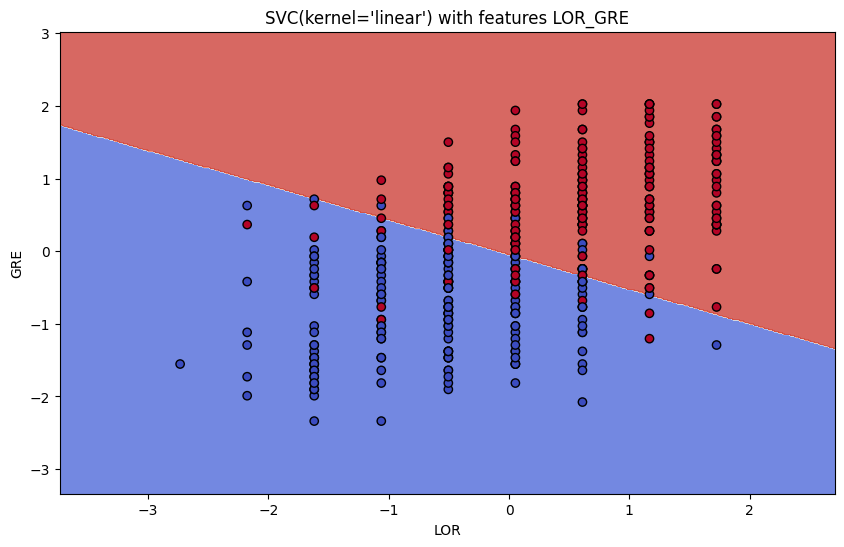

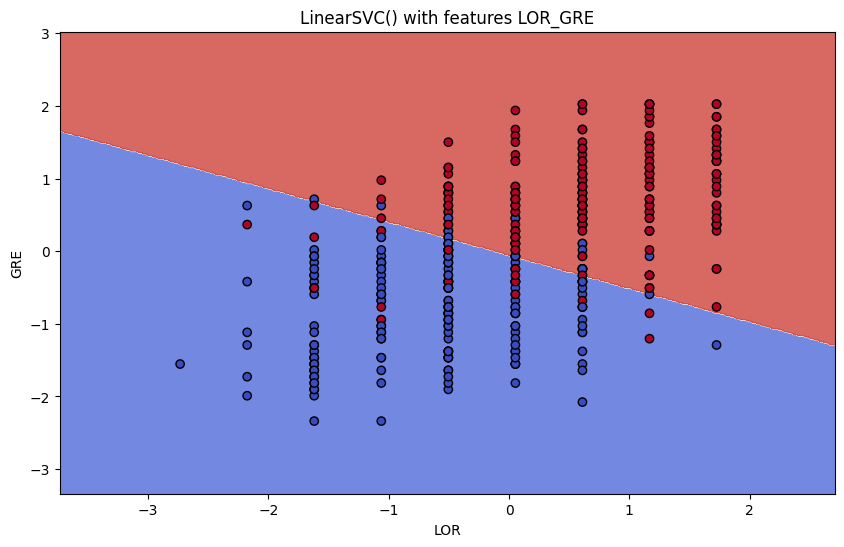

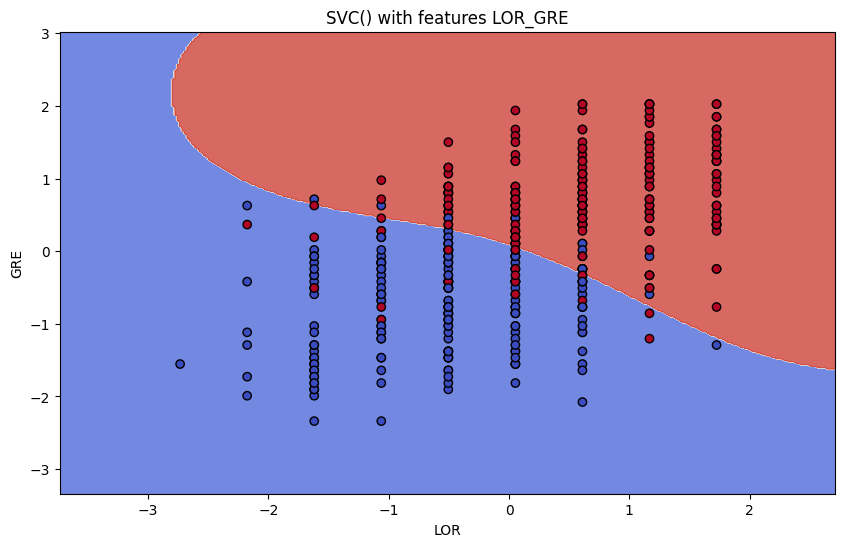

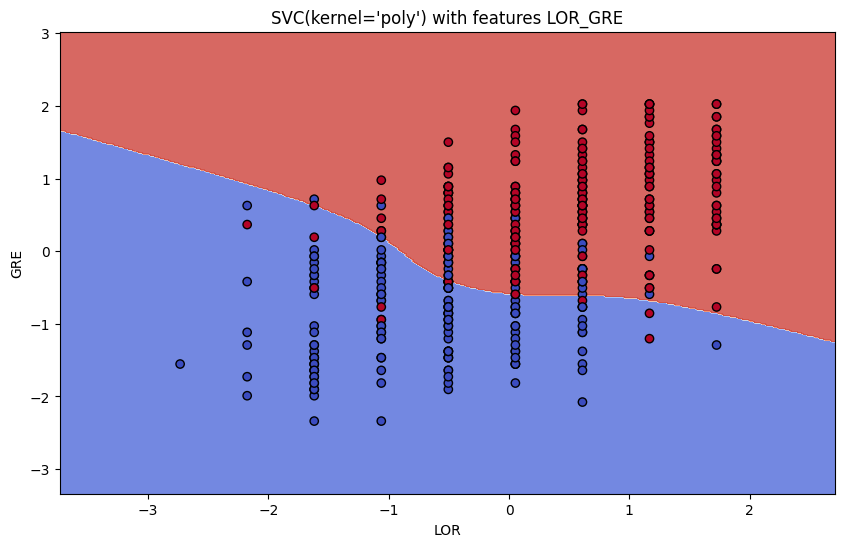

In [127]:
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model,features, title):
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    plt.figure(figsize=(10,6))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(f'{features[0]}')
    plt.ylabel(f'{features[1]}')
    plt.title(title)
    plt.show()

# Plotting decision boundaries
for combo_name, features in feature_combinations.items():
    X = data[features].values
    y = data['Admit'].values
    X = StandardScaler().fit_transform(X)

    for model in [svc_linear, linear_svc, svc_rbf, svc_poly]:
        plot_decision_boundaries(X, y, model,combo_name.split('_'),f"{model} with features {combo_name}")

#### 3.d) Result Analysis based on Visualization only



Based on the above visualizations `CGPA vs GRE` plot shows the best decision boundary seperating the two classes well.

### Detailed Analysis of SVM Classification Visualization

- **Decision Boundary**: The boundary is non-linear and appears to effectively separate the two classes, with only few blue points in the red region and vice versa. This indicates that the polynomial kernel is well-suited for this dataset.

- **Class Distribution**: The data points suggest a correlation between the two features, with a concentration of points where both CGPA and GRE are high.

- **Margin and Support Vectors**: The margin, which is the distance between the decision boundary and the closest data points of both classes, is not clearly visible in this image. However, these closest points, known as support vectors, are critical in defining the margin of the classifier.

- **Classification Performance**: The classifier seems to perform well with a clear distinction between the two classes. 

- **Overlapping Points**: Some red and blue points are in close proximity near the decision boundary, suggesting that the two features alone may not be sufficient for distinct classification in all cases.

- **Outliers**: The plot shows most points solidly within their respective decision regions, implying the model does not have to deal with many extreme values that could affect the decision boundary's shape.



 #### 3.f) Result Postprocessing

#### One-Class SVM for Outlier Detection

A One-Class SVM is a specialized version of the Support Vector Machine that is used for anomaly detection, which in this context refers to the detection of outliers. Unlike traditional SVMs that are used for classification or regression tasks, a One-Class SVM is trained only on the 'normal' data. Its objective is to find a decision boundary that best separates the majority of the data (normal points) from the outliers. 

##### How One-Class SVM Works

##### Training on Normal Data
- The One-Class SVM is trained on data that is assumed to be normal. 
- It does not require a separate outlier dataset for training. 
- This is particularly useful in situations where you have a lot of normal data but very few known outliers.

##### Defining a Decision Function
- The algorithm learns a decision function that encloses the normal data points. 
- The decision function is typically characterized by a hyperplane and a margin. 
- The goal is to maximize the distance of the hyperplane from the origin in the feature space, while keeping most of the data points within the margin.

##### Detecting Outliers
- For a new data point, the decision function predicts whether it falls inside or outside the learned region. 
- Points falling outside are marked as outliers. 
- In the feature space, these are points that lie on the far side of the hyperplane, indicating that they are significantly different from the training data.

##### Adjusting Sensitivity
- The sensitivity of the model to outliers can be adjusted using hyperparameters like `nu` and `gamma`.
- The `nu` parameter (which lies between 0 and 1) sets an upper bound on the fraction of outliers in the training data and a lower bound on the fraction of support vectors.
- The `gamma` parameter defines how much influence a single training example has. The larger the gamma, the closer other examples must be to be affected.

##### Handling High-Dimensional Data
- One-Class SVM can handle high-dimensional feature spaces (like those created by polynomial or RBF kernels).
- This is useful when dealing with complex datasets where outliers might not be easily separable in the original feature space.
